# biohansel scheme creation

Trying out a recursive approach from flat clusters defined at multiple levels from hierarchical clustering of the binary SNV matrix from a VCF file. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# init logging level info
import logging
LOG_FORMAT = '%(asctime)s %(levelname)s: %(message)s [in %(filename)s:%(lineno)d]'
logging.basicConfig(format=LOG_FORMAT, level=logging.DEBUG)

In [3]:
from biohansel.create.clustering import HClust
from biohansel.create.subtype_node import SubtypeNode
from biohansel.create.io import newick_from_linkage, parse_vcf

In [4]:
!gunzip core-SH-1001.vcf.gz

gzip: core-SH-1001.vcf.gz: No such file or directory


In [5]:
vcf_filepath = 'core-SH-1001.vcf'

In [6]:
df_nt, df_bin = parse_vcf(vcf_filepath)

In [7]:
df_bin.shape

(37727, 1002)

In [8]:
hc = HClust.from_binary_snp_matrix(df_bin, pdist_metric='euclidean', linkage_method='single')

2018-12-04 09:41:11,367 INFO: Computing distance matrix using the "euclidean" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:41:30,747 INFO: Computed distance matrix of size 501501 using the "euclidean" metric from binary SNV matrix of shape (37727, 1002) [in clustering.py:59]
2018-12-04 09:41:30,750 INFO: Performing hierarchical clustering of distance matrix using "single" linkage method. [in clustering.py:61]
2018-12-04 09:41:30,759 INFO: Performed hierarchical clustering using "single" linkage method to produce linkage array with dimensions (1001, 4). [in clustering.py:63]
2018-12-04 09:41:30,808 INFO: No distance thresholds specified. Using n=1294 unique distances from the distance matrix [in clustering.py:95]
2018-12-04 09:41:34,321 INFO: Defined flat clusters at N=79 non-redundant distance threshold levels. [in clustering.py:68]


In [9]:
subtype_node = SubtypeNode.from_fclusters(hc.df_clusters, df_bin, min_group_size=5, min_num_snvs=2)

2018-12-04 09:41:34,339 INFO: Initialized root SubtypeNode with distance=78.89233169326408 and N=1002 members. [in subtype_node.py:311]
2018-12-04 09:41:34,340 INFO: Building full tree of SubtypeNodes from clusters table of size (1002, 79) and minimum group size of 5 [in subtype_node.py:312]
2018-12-04 09:41:36,217 INFO: Dropping internal SubtypeNodes that do not meet minimum size requirement of 5 [in subtype_node.py:315]
2018-12-04 09:41:36,361 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-12-04 09:41:36,362 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:41:36,596 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.89e+01 N=1002 from everything else! SNV count=0 [in subtype_node.py:

2018-12-04 09:41:47,281 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=88 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:47,499 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=60 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:47,718 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=55 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:47,940 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:48,162 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:48,388 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else [in subtype_node.py:131]
2018-12-04 09:41:48,609 INFO: Could not find

2018-12-04 09:41:58,795 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=63 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:59,018 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:59,241 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:59,466 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:59,691 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:41:59,925 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:42:0

In [10]:
subtype_node.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,7,995,1002,0,78.892332
1,1,806,175,981,92,34.176015
2,1.1,54,0,54,8,4.582576
3,1.2,16,0,16,2,3.741657
4,1.3,15,0,15,7,4.472136
5,1.4,12,0,12,2,3.741657
6,1.5,6,5,11,2,4.000000
7,1.5.1,5,0,5,3,3.464102
8,1.6,9,0,9,5,3.464102
9,1.7,9,0,9,13,4.795832


# Schemes from clusters derived from different methods and metrics

Combinations of different pairwise distance metrics and hierarchical clustering linkage methods may produce different schemes. In the following cell, I am looping through all possible combinations of `pdist` metrics and `linkage` methods. 

In [11]:
def create_scheme(df_bin, pdist_metric, linkage_method):
    hc = HClust.from_binary_snp_matrix(df_bin, pdist_metric=pdist_metric, linkage_method=linkage_method)
    nwk = newick_from_linkage(hc.linkage_array, df_bin.columns)
    subtype_node = SubtypeNode.from_fclusters(hc.df_clusters, df_bin, min_group_size=5, min_num_snvs=2)
    df_glst = subtype_node.subtype_level_table(index=hc.df_clusters.index)
    
    del hc.distance_matrix
    del hc.linkage_array
    
    return dict(pdist_metric=pdist_metric, 
         linkage_method=linkage_method,
         subtype_node=subtype_node,
         df_subtype_level=df_glst,
         newick=nwk,
         df_clusters=hc.df_clusters)

In [12]:
from multiprocessing import Pool

In [13]:
pool = Pool(48)

2018-12-04 09:42:51,100 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:52,303 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:53,489 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:54,577 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:55,787 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:57,031 INFO: Computing distance matrix using the "hamming" metric from binary SNV matrix of shape (37727, 1002). [in clustering.py:56]
2018-12-04 09:42:58,183 INFO: Computing distance matrix using the "jaccard" metric from 

2018-12-04 09:43:24,022 INFO: Initialized root SubtypeNode with distance=0.6914146367323137 and N=1002 members. [in subtype_node.py:311]
2018-12-04 09:43:24,024 INFO: Building full tree of SubtypeNodes from clusters table of size (1002, 97) and minimum group size of 5 [in subtype_node.py:312]
2018-12-04 09:43:24,500 INFO: Dropping internal SubtypeNodes that do not meet minimum size requirement of 5 [in subtype_node.py:315]
2018-12-04 09:43:24,770 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-12-04 09:43:24,772 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:43:25,068 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.65e-01 N=1002 from everything else! SNV count=0 [in subtype_node.py

2018-12-04 09:43:29,624 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:43:29,662 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.56e-03 N=452 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:29,724 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.84e-03 N=935 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:29,890 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.91e-01 N=1002 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:29,901 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.45e-04 N=78 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:29,986 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.30e-03 N=258 from everything else! SNV count=0 [in subtype_node.py:135]
2018

2018-12-04 09:43:31,999 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:32,040 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.49e-03 N=212 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:32,113 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.14e-03 N=375 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:32,122 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.22e-04 N=216 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:32,250 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:32,268 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:

2018-12-04 09:43:34,308 INFO: No distance thresholds specified. Using n=1294 unique distances from the distance matrix [in clustering.py:95]
2018-12-04 09:43:34,327 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.45e-04 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:34,340 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:34,487 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:34,507 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:34,571 INFO: Found 3 SNVs for differentiating SubtypeNode d=5.30e-04 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:43:34,595 INFO: Could not find enough SNVs for differe

2018-12-04 09:43:36,570 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:43:36,747 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.39e-04 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:43:36,757 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:36,777 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:36,828 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-05 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:36,832 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:36,836 INFO: Could not

2018-12-04 09:43:38,939 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:38,957 INFO: Found 6 SNVs for differentiating SubtypeNode d=7.95e-04 N=60 from everything else [in subtype_node.py:131]
2018-12-04 09:43:38,983 INFO: Initialized root SubtypeNode with distance=163.214582681818 and N=1002 members. [in subtype_node.py:311]
2018-12-04 09:43:38,985 INFO: Building full tree of SubtypeNodes from clusters table of size (1002, 158) and minimum group size of 5 [in subtype_node.py:312]
2018-12-04 09:43:38,998 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-05 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:39,028 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.10e-04 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:39,091 INFO: Could not find enough SNVs for differentiating Su

2018-12-04 09:43:40,824 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:40,932 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.03e+01 N=948 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:40,940 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.27e-03 N=94 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:40,945 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-12-04 09:43:40,946 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:43:40,960 INFO: Found 7 SNVs for differentiating SubtypeNode d=8.22e-04 N=6 from 

2018-12-04 09:43:42,296 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.89e+01 N=1002 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:42,320 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:42,370 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.15e+01 N=941 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:42,420 INFO: Found 6 SNVs for differentiating SubtypeNode d=6.63e-04 N=10 from everything else [in subtype_node.py:131]
2018-12-04 09:43:42,442 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:42,457 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-05 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:42,467 INFO: Could not f

2018-12-04 09:43:43,812 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.00e+00 N=303 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:43,857 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:43,904 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.04e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:43,908 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:43,928 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.93e+00 N=258 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:43,945 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=38 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43

2018-12-04 09:43:45,074 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.83e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:45,097 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.57e+00 N=411 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:45,105 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.23e+01 N=509 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:45,107 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=24 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:45,109 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.01e-04 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:45,123 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=40 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:4

2018-12-04 09:43:46,375 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-05 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:46,413 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=34 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:46,447 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:46,469 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.46e+00 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:43:46,492 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:46,518 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.18e-04 N=104 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:46,565 INFO: Could not find 

2018-12-04 09:43:47,679 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=49 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:47,737 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:47,763 INFO: Found 4 SNVs for differentiating SubtypeNode d=3.16e+00 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:43:47,813 INFO: Found 5 SNVs for differentiating SubtypeNode d=6.89e-04 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:43:47,859 INFO: Found 7 SNVs for differentiating SubtypeNode d=9.81e-04 N=15 from everything else [in subtype_node.py:131]
2018-12-04 09:43:47,871 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:47,880 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 

2018-12-04 09:43:49,036 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:49,068 INFO: Found 6 SNVs for differentiating SubtypeNode d=4.51e-04 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:43:49,076 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.12e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:49,132 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.36e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:49,136 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:49,169 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.06e-03 N=162 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:49,204 INFO: Could not find e

2018-12-04 09:43:50,385 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=55 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:50,389 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:50,401 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:50,471 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:50,479 INFO: Found 13 SNVs for differentiating SubtypeNode d=5.83e-04 N=8 from everything else [in subtype_node.py:131]
2018-12-04 09:43:50,494 INFO: Found 2 SNVs for differentiating SubtypeNode d=3.74e+00 N=11 from everything else [in subtype_node.py:131]
2018-12-04 09:43:50,501 INFO: Could not find enough SNVs for differentia

2018-12-04 09:43:51,630 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-05 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:51,791 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.30e-04 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:51,813 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e-04 N=19 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:51,814 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:51,820 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.77e-04 N=139 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:51,840 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.47e+00 N=28 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:

2018-12-04 09:43:53,009 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.39e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:53,065 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:53,071 INFO: Found 7 SNVs for differentiating SubtypeNode d=4.12e+00 N=6 from everything else [in subtype_node.py:131]
2018-12-04 09:43:53,106 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.39e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:53,159 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.45e-04 N=25 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:53,224 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:53,230 INFO: Could not find en

2018-12-04 09:43:54,366 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:54,378 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.86e-04 N=7 from everything else [in subtype_node.py:131]
2018-12-04 09:43:54,393 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:54,414 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:54,450 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-04 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:54,472 INFO: Found 8 SNVs for differentiating SubtypeNode d=6.40e+00 N=54 from everything else [in subtype_node.py:131]
2018-12-04 09:43:54,500 INFO: Could not find enough SNVs for differentiatin

2018-12-04 09:43:55,712 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-05 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:55,715 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.98e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:55,717 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=26 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:55,736 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=32 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:55,769 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.69e-04 N=141 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:55,788 INFO: Found 3 SNVs for differentiating SubtypeNode d=3.71e-04 N=8 from everything else [in subtype_node.py:131]
2018-12-04 09:43:55,880 INFO: Could not find 

2018-12-04 09:43:57,048 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=8 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:43:57,079 INFO: Found 4 SNVs for differentiating SubtypeNode d=6.10e-04 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:43:57,085 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.95e-04 N=129 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:57,085 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.80e+00 N=144 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:57,095 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:57,098 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:57,107 INFO: Could not find

2018-12-04 09:43:58,340 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-04 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:58,406 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:58,439 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-04 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:43:58,457 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=91 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:58,458 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=45 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:58,459 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.16e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:5

2018-12-04 09:43:59,615 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.35e-03 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59,620 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59,649 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59,770 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59,773 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59,776 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:43:59

2018-12-04 09:44:00,999 INFO: Found 10 SNVs for differentiating SubtypeNode d=3.18e-03 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:01,009 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.47e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:01,022 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.27e-03 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:01,029 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:01,077 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=28 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:01,080 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.20e-03 N=8 from everything else [in subtype_node.py:131]
2018-12-04 09:44:01,087 INFO: Could not find enough SNVs for differentiati

2018-12-04 09:44:02,135 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.00e+00 N=166 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:02,141 INFO: Found 13 SNVs for differentiating SubtypeNode d=4.80e+00 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:44:02,167 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.58e+00 N=139 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:02,188 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:02,197 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.83e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:02,289 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:02,342 INFO: Found 13 SNVs

2018-12-04 09:44:03,432 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.42e-04 N=57 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:03,450 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.82e+01 N=210 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:03,458 INFO: Found 4 SNVs for differentiating SubtypeNode d=7.42e-04 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:03,472 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.00e+00 N=129 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:03,510 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.92e+00 N=123 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:03,521 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=101 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:03,546 INFO: Could not 

2018-12-04 09:44:04,631 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.46e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:04,667 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.01e-03 N=20 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:04,699 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=57 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:04,741 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.98e-04 N=10 from everything else [in subtype_node.py:131]
2018-12-04 09:44:04,747 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:04,765 INFO: Found 2 SNVs for differentiating SubtypeNode d=2.45e+00 N=7 from everything else [in subtype_node.py:131]
2018-12-04 09:44:04,801 INFO: Could not find enough SNVs for differentia

2018-12-04 09:44:05,806 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.16e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:05,810 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:05,828 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:05,845 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:05,903 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:05,911 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.74e+00 N=16 from everything else [in subtype_node.py:131]
2018-12-04 09:44:05,950 INFO: Found 10 SNVs fo

2018-12-04 09:44:07,011 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.74e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:07,018 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.48e+00 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:07,061 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:07,122 INFO: Found 10 SNVs for differentiating SubtypeNode d=1.25e-03 N=11 from everything else [in subtype_node.py:131]
2018-12-04 09:44:07,138 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:07,137 INFO: Found 712 SNVs for differentiating SubtypeNode d=3.82e-02 N=6 from everything else [in subtype_node.py:131]
2018-12-04 09:44:07,139 INFO: Dropping SubtypeNodes that do not contai

2018-12-04 09:44:08,392 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:08,395 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:08,450 INFO: Found 4 SNVs for differentiating SubtypeNode d=4.80e+00 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:08,459 INFO: Found 9 SNVs for differentiating SubtypeNode d=5.00e+00 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:08,579 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=27 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:08,587 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.94e-03 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:08,619 INFO: Could not find enough SNVs for differentiatin

2018-12-04 09:44:09,717 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.92e-04 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:09,752 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:09,764 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.47e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:09,805 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=45 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:09,819 INFO: Found 8 SNVs for differentiating SubtypeNode d=5.10e+00 N=54 from everything else [in subtype_node.py:131]
2018-12-04 09:44:09,826 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.87e+00 N=123 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:09,827 INFO: Found 46 SNVs f

2018-12-04 09:44:11,455 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:11,494 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.48e+00 N=129 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:11,506 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.48e+00 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:11,519 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:11,538 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.00e+00 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:11,689 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.73e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:11,719 INFO: Could not find en

2018-12-04 09:44:13,397 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:13,509 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:13,526 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:13,550 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.00e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:13,624 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.00e+00 N=10 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:44:13,634 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.36e-04 N=31 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:13

2018-12-04 09:44:15,794 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:15,794 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.83e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:15,881 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.22e+01 N=171 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:15,908 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.10e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:16,034 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.86e-03 N=19 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:16,058 INFO: Found 16 SNVs for differentiating SubtypeNode d=6.40e+00 N=57 from everything else [in subtype_node.py:131]
2018-12-04 09:44:16,059 INFO: Could not find

2018-12-04 09:44:18,271 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.72e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,303 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.10e+00 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,353 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,369 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.65e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,369 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.33e-03 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,400 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.32e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:18,5

2018-12-04 09:44:20,519 INFO: Found 2 SNVs for differentiating SubtypeNode d=2.45e+00 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:44:20,646 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.59e-04 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:20,722 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e+00 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:20,781 INFO: Found 5 SNVs for differentiating SubtypeNode d=4.24e+00 N=10 from everything else [in subtype_node.py:131]
2018-12-04 09:44:20,798 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.24e+00 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:20,904 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.78e-03 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:20,967 INFO: Could not find enough SNVs for differentiat

2018-12-04 09:44:23,953 INFO: Sorting all children for all SubtypeNodes by size from largest to smallest [in subtype_node.py:329]
2018-12-04 09:44:23,954 INFO: Assigning hierarchical subtype designations for all SubtypeNodes [in subtype_node.py:331]
2018-12-04 09:44:24,106 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.75e+00 N=22 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:24,356 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.32e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:24,615 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:24,879 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:25,140 INFO: Found 2 SNVs for differentiating SubtypeNode d=4.36e+00 N=5 from e

2018-12-04 09:44:33,420 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.61e+00 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:33,670 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.45e+00 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:33,926 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.54e+00 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:34,184 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.58e+00 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:34,441 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.24e+00 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:34,668 INFO: Found 14 SNVs for differentiating SubtypeNode d=7.89e+01 N=177 from everything else [in subtype_node.py:131]
2018-12-04 09:44:34,918 INFO: Could not find

2018-12-04 09:44:59,456 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.43e-01 N=239 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:59,683 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.05e-01 N=160 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:44:59,917 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.95e-01 N=132 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:00,215 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.94e-01 N=126 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:00,498 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.90e-01 N=107 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:00,782 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.77e-01 N=79 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 

2018-12-04 09:45:06,425 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.00e-02 N=24 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:06,430 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.56e-01 N=479 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:06,548 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.34e-01 N=405 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:06,676 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.57e-02 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:06,760 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.27e-01 N=455 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:06,797 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.91e-01 N=242 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 0

2018-12-04 09:45:10,062 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.70e-02 N=26 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:10,092 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.09e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:10,214 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.29e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:10,320 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.98e-01 N=153 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:10,344 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.27e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:10,384 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.28e-02 N=17 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:

2018-12-04 09:45:13,684 INFO: Found 4 SNVs for differentiating SubtypeNode d=1.02e-01 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:45:13,775 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.80e-02 N=13 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:13,789 INFO: Found 5 SNVs for differentiating SubtypeNode d=2.75e-01 N=12 from everything else [in subtype_node.py:131]
2018-12-04 09:45:13,881 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.99e-01 N=43 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:13,930 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.70e-01 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:14,037 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.76e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:14,064 INFO: Could not find enough SNVs for differentia

2018-12-04 09:45:16,989 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.85e-01 N=85 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:17,078 INFO: Found 5 SNVs for differentiating SubtypeNode d=3.46e-01 N=67 from everything else [in subtype_node.py:131]
2018-12-04 09:45:17,149 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-12-04 09:45:17,151 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:45:17,186 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.38e-01 N=107 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:17,236 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.80e-01 N=51 from everything else [in subty

2018-12-04 09:45:19,851 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.41e-02 N=8 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:45:19,853 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.91e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:19,962 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.81e-02 N=32 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:19,996 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.27e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:20,065 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.22e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:20,113 INFO: Found 2 SNVs for differentiating SubtypeNode d=1.91e-01 N=8 from everything else [in subtype_node.py:131]
2018-12-04 09:45:20,199 INFO: Found 7 SNVs for d

2018-12-04 09:45:22,712 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.59e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:22,752 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.48e-01 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:22,799 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.09e-01 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:45:22,806 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.94e-02 N=18 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:22,924 INFO: Found 20 SNVs for differentiating SubtypeNode d=5.17e-01 N=46 from everything else [in subtype_node.py:131]
2018-12-04 09:45:23,021 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.07e-01 N=15 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:23,032 INFO: Could not find

2018-12-04 09:45:25,523 INFO: Found 7 SNVs for differentiating SubtypeNode d=3.69e-01 N=15 from everything else [in subtype_node.py:131]
2018-12-04 09:45:25,523 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.74e-02 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:25,720 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.44e-01 N=110 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:25,733 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.19e-02 N=16 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:25,750 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.38e-02 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:25,769 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.57e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:25,831 INFO: Could not find

2018-12-04 09:45:28,243 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.94e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:28,369 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.17e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:28,443 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.84e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:28,466 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.39e-01 N=68 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:28,479 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e-01 N=10 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:45:28,507 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.82e-02 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:28,

2018-12-04 09:45:31,054 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.32e-02 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:31,117 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.71e-01 N=17 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:31,151 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.49e-02 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:31,228 INFO: Filtered binary SNV matrix from N=37727 rows to N=7640 rows based on minimum group size of 5. Only SNVs present in at least 5 genomes will be used to find SNVs differentiating subgroups. [in subtype_node.py:321]
2018-12-04 09:45:31,230 INFO: Finding SNVs that differentiate genomes belonging to each SubtypeNode from binary SNV matrix with size (7640, 1002) [in subtype_node.py:324]
2018-12-04 09:45:31,242 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.63e-

2018-12-04 09:45:33,296 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.58e-02 N=20 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,323 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.94e-01 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,387 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.50e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,411 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.27e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,476 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.13e-02 N=5 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,572 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.41e-01 N=59 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:33,

2018-12-04 09:45:35,766 INFO: Found 9 SNVs for differentiating SubtypeNode d=5.61e-01 N=19 from everything else [in subtype_node.py:131]
2018-12-04 09:45:35,776 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.12e-01 N=8 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:35,819 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.07e-01 N=12 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:35,957 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.23e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:36,018 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.08e-01 N=40 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:36,082 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.23e-01 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:36,089 INFO: Could not find 

2018-12-04 09:45:38,797 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.38e-01 N=112 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:38,804 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.95e-01 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:45:38,939 INFO: Could not find enough SNVs for differentiating SubtypeNode d=2.17e-01 N=34 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:38,955 INFO: Could not find enough SNVs for differentiating SubtypeNode d=3.13e-01 N=129 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:38,983 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.41e-02 N=19 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:39,054 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.35e-01 N=26 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:39,060 INFO: Could not fi

2018-12-04 09:45:41,522 INFO: Found 4 SNVs for differentiating SubtypeNode d=2.87e-01 N=5 from everything else [in subtype_node.py:131]
2018-12-04 09:45:41,555 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.45e-01 N=53 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:41,672 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.43e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:41,691 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.22e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:41,724 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.19e-02 N=14 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:41,806 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.85e-01 N=47 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:41,878 INFO: Could not find 

2018-12-04 09:45:44,474 INFO: Assigning hierarchical subtype designations for all SubtypeNodes [in subtype_node.py:331]
2018-12-04 09:45:44,482 INFO: Could not find enough SNVs for differentiating SubtypeNode d=6.07e-01 N=45 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:44,483 INFO: Found 18 SNVs for differentiating SubtypeNode d=8.82e-01 N=215 from everything else [in subtype_node.py:131]
2018-12-04 09:45:44,575 INFO: Found 2 SNVs for differentiating SubtypeNode d=5.20e-01 N=14 from everything else [in subtype_node.py:131]
2018-12-04 09:45:44,585 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.25e-01 N=23 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:44,744 INFO: Could not find enough SNVs for differentiating SubtypeNode d=4.92e-01 N=130 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:44,804 INFO: Could not find enough SNVs for differentiating SubtypeNode d=5.83e-01 N=32 from e

2018-12-04 09:45:47,996 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.71e-01 N=7 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:48,072 INFO: Could not find enough SNVs for differentiating SubtypeNode d=9.47e-02 N=9 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:48,196 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.54e-01 N=33 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:48,236 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=44 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:48,330 INFO: Found 2 SNVs for differentiating SubtypeNode d=2.04e-01 N=12 from everything else [in subtype_node.py:131]
2018-12-04 09:45:48,436 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.15e-01 N=28 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:48,490 INFO: Could not find 

2018-12-04 09:45:53,206 INFO: Found 32 SNVs for differentiating SubtypeNode d=6.75e-01 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:45:53,332 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.63e-01 N=10 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:53,516 INFO: Found 62 SNVs for differentiating SubtypeNode d=9.75e-01 N=11 from everything else [in subtype_node.py:131]
2018-12-04 09:45:53,567 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.99e-02 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:45:53,802 INFO: Found 1669 SNVs for differentiating SubtypeNode d=9.15e-01 N=9 from everything else [in subtype_node.py:131]
2018-12-04 09:45:53,805 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=28 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:45:54,050 INFO: Could not find enough SNVs for differentiating SubtypeNode d=8.72

2018-12-04 09:46:03,024 INFO: Found 10 SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else [in subtype_node.py:131]
2018-12-04 09:46:03,259 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.60e-01 N=5 from everything else! SNV count=1 [in subtype_node.py:135]
2018-12-04 09:46:03,491 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:46:03,725 INFO: Could not find enough SNVs for differentiating SubtypeNode d=7.56e-01 N=6 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:46:03,961 INFO: Could not find enough SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else! SNV count=0 [in subtype_node.py:135]
2018-12-04 09:46:04,191 INFO: Found 7 SNVs for differentiating SubtypeNode d=1.00e+00 N=11 from everything else [in subtype_node.py:131]
2018-12-04 09:46:04,419 INFO: Could not find enough SNVs for differenti

In [14]:
pdist_metrics = '''
hamming
jaccard
euclidean
'''.strip().split('\n')
linkage_methods = '''
single
average
complete
centroid
median
ward
'''.strip().split('\n')

results = []
for pdist_metric in pdist_metrics:
    for linkage_method in linkage_methods:
        print(pdist_metric, linkage_method)
        results.append(pool.apply_async(create_scheme, (df_bin, pdist_metric, linkage_method)))

pdist_linkage_subtype_info = [r.get() for r in results]

hamming single
hamming average
hamming complete
hamming centroid
hamming median
hamming ward
jaccard single
jaccard average
jaccard complete
jaccard centroid
jaccard median
jaccard ward
euclidean single
euclidean average
euclidean complete
euclidean centroid
euclidean median
euclidean ward


In [15]:
pool.close()

In [16]:
pool.terminate()

How many subtyping schemes have been created from different combinations of distance metrics and clustering methods

In [17]:
len(pdist_linkage_subtype_info)

18

Take a look at one of the subtyping schemes to see how it looks

In [19]:
stn = pdist_linkage_subtype_info[0]['subtype_node']

In [20]:
len(list(stn.leaves()))

17

In [21]:
stn.summary_table()

,subtype,exclusive_genomes,child_genomes,total_genomes,n_snvs,distance_level
0,None,7,995,1002,0,0.164975
1,1,806,175,981,92,0.030959
2,1.1,54,0,54,8,0.000557
3,1.2,16,0,16,2,0.000371
4,1.3,15,0,15,7,0.000530
5,1.4,12,0,12,2,0.000371
6,1.5,6,5,11,2,0.000424
7,1.5.1,5,0,5,3,0.000318
8,1.6,9,0,9,5,0.000318
9,1.7,9,0,9,13,0.000610


## Serialize `pdist_linkage_subtype_info` object to pickle file

It's expensive to remake the `pdist_linkage_subtype_info` object with all the potential schemes created using different distance metrics and clustering methods, so it's serialized for easy use elsewhere for experimentation. 

In [24]:
import pickle

In [25]:
pickle.dump(pdist_linkage_subtype_info, open('2018-12-04-pdist_linkage_subtype_info.pickle', 'wb'))

In [31]:
!ls -lh *.pickle

-rw-r--r-- 1 pkruczkiewicz grp_pkruczkiewicz 19M Dec  4 08:35 2018-09-06-pdist_linkage_subtype_info.pickle
-rw-r--r-- 1 pkruczkiewicz grp_pkruczkiewicz 19M Dec  4 09:48 2018-12-04-pdist_linkage_subtype_info.pickle


# Merging subgroups from different methods and metrics

Loading from pre-created groups.

Focusing on leaf subgroups first to see if it's possible to layer them and then link them, i.e. create a new `SubtypeNode` tree. 

- Trying to extract the non-overlapping subtype nodes.
- Sorting by length of genomes to get the shortest into the nr list first
- recurse through the redundant subtypes until no redundant ones left? 
  - For each recursion add it to a new level
  - link up to subtype node info
  - output to table viewable in Phandango with tree to see if the groupings make sense
  - could try to add in super nodes in the same fashion
  - rebuild the subtype node hierarchy using the info from existing subtype nodes and trying to find overlap between nodes on different levels

In [39]:
import pickle
from collections import defaultdict

import pandas as pd
import numpy as np

In [40]:
pdist_linkage_subtype_info = pickle.load(open('2018-12-04-pdist_linkage_subtype_info.pickle', 'rb'))

In [41]:
def recur_build_node_levels(genomes_sets, out = None):
    if out is None:
        out = []
    nr_subtypes = []
    redundant_subtypes = []
    genomes_sets.sort(key=lambda x: len(x))
    for gs in genomes_sets:
        is_nr = True
        for gs_nr in nr_subtypes:
            if len(gs_nr & gs) > 0:
                is_nr = False
                redundant_subtypes.append(gs)
                break
        if is_nr:
            nr_subtypes.append(gs)
    
    if len(nr_subtypes) > 0:
        out.append(nr_subtypes)
    logging.info(f'Levels={len(out)}; # of redundant subtypes={len(redundant_subtypes)}; # of non-redundant subtypes={len(nr_subtypes)}')
    if len(redundant_subtypes) > 0:
        recur_build_node_levels(redundant_subtypes, out=out)
    return out

In [42]:
leaf_genomes_to_stn = {}
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in stn.leaves():
        if lstn.genomes in leaf_genomes_to_stn:
            print(f'Already has {len(lstn.genomes)} subtype={lstn.subtype} {st_info["pdist_metric"]} {st_info["linkage_method"]}')
        leaf_genomes_to_stn[lstn.genomes] = lstn

Already has 7 subtype=1.10 hamming average
Already has 5 subtype=1.14 hamming average
Already has 8 subtype=2 hamming average
Already has 6 subtype=3 hamming average
Already has 12 subtype=1.1.1 hamming complete
Already has 5 subtype=1.1.4 hamming complete
Already has 15 subtype=1.3 hamming complete
Already has 9 subtype=1.6 hamming complete
Already has 8 subtype=1.8 hamming complete
Already has 5 subtype=1.12 hamming complete
Already has 5 subtype=1.13 hamming complete
Already has 5 subtype=1.14 hamming complete
Already has 8 subtype=2 hamming complete
Already has 6 subtype=3 hamming complete
Already has 25 subtype=1.1.1 hamming centroid
Already has 8 subtype=1.1.2 hamming centroid
Already has 5 subtype=1.2.1.1 hamming centroid
Already has 10 subtype=1.2.2 hamming centroid
Already has 5 subtype=1.2.3 hamming centroid
Already has 15 subtype=1.3 hamming centroid
Already has 5 subtype=1.4.1 hamming centroid
Already has 7 subtype=1.6 hamming centroid
Already has 7 subtype=1.7 hamming cent

In [43]:
len(leaf_genomes_to_stn)

77

In [44]:
sum([len(x) for x in leaf_genomes_to_stn])

1086

In [45]:
len({y for x in leaf_genomes_to_stn for y in x})

706

In [46]:
child_node_levels = recur_build_node_levels(list(leaf_genomes_to_stn.keys()))

2018-12-04 09:56:02,322 INFO: Levels=1; # of redundant subtypes=28; # of non-redundant subtypes=49 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:02,324 INFO: Levels=2; # of redundant subtypes=7; # of non-redundant subtypes=21 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:02,325 INFO: Levels=3; # of redundant subtypes=2; # of non-redundant subtypes=5 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:02,327 INFO: Levels=4; # of redundant subtypes=0; # of non-redundant subtypes=2 [in <ipython-input-41-fac3ff8df0c8>:19]


In [47]:
for cnl in child_node_levels:
    print(len(cnl), len({y for x in cnl for y in x}))

49 506
21 362
5 140
2 78


In [48]:
def recur_children(stn):
    for c in stn.children:
        yield c
        yield from recur_children(c)

In [49]:
len(list(recur_children(stn)))

24

In [50]:
len(stn.children)

16

In [51]:
genomes_to_stn = {}
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in recur_children(stn):
        if lstn.genomes in genomes_to_stn:
            print(f'Already has {len(lstn.genomes)} subtype={lstn.subtype} {st_info["pdist_metric"]} {st_info["linkage_method"]}')
        genomes_to_stn[lstn.genomes] = lstn

Already has 981 subtype=1 hamming average
Already has 54 subtype=1.1 hamming average
Already has 7 subtype=1.10 hamming average
Already has 5 subtype=1.14 hamming average
Already has 8 subtype=2 hamming average
Already has 6 subtype=3 hamming average
Already has 981 subtype=1 hamming complete
Already has 12 subtype=1.1.1 hamming complete
Already has 5 subtype=1.1.4 hamming complete
Already has 54 subtype=1.2 hamming complete
Already has 15 subtype=1.3 hamming complete
Already has 11 subtype=1.5 hamming complete
Already has 9 subtype=1.6 hamming complete
Already has 8 subtype=1.8 hamming complete
Already has 5 subtype=1.12 hamming complete
Already has 5 subtype=1.13 hamming complete
Already has 5 subtype=1.14 hamming complete
Already has 8 subtype=2 hamming complete
Already has 6 subtype=3 hamming complete
Already has 981 subtype=1 hamming centroid
Already has 25 subtype=1.1.1 hamming centroid
Already has 8 subtype=1.1.2 hamming centroid
Already has 54 subtype=1.2 hamming centroid
Alrea

In [52]:
genomes_to_stn_info = defaultdict(list)
for st_info in pdist_linkage_subtype_info:
    stn = st_info['subtype_node']
    for lstn in recur_children(stn):
        genomes_to_stn_info[lstn.genomes].append((lstn, st_info))

In [53]:
node_levels = recur_build_node_levels(list(genomes_to_stn.keys()))

2018-12-04 09:56:27,242 INFO: Levels=1; # of redundant subtypes=35; # of non-redundant subtypes=49 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:27,245 INFO: Levels=2; # of redundant subtypes=13; # of non-redundant subtypes=22 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:27,246 INFO: Levels=3; # of redundant subtypes=5; # of non-redundant subtypes=8 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:27,247 INFO: Levels=4; # of redundant subtypes=2; # of non-redundant subtypes=3 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:27,248 INFO: Levels=5; # of redundant subtypes=1; # of non-redundant subtypes=1 [in <ipython-input-41-fac3ff8df0c8>:19]
2018-12-04 09:56:27,250 INFO: Levels=6; # of redundant subtypes=0; # of non-redundant subtypes=1 [in <ipython-input-41-fac3ff8df0c8>:19]


In [54]:
for cnl in node_levels:
    print(len(cnl), len({y for x in cnl for y in x}))

49 506
22 371
8 535
3 128
1 67
1 981


In [56]:
from collections import defaultdict

import pandas as pd
import numpy as np

In [57]:
def node_level_table(node_levels, view_in_phandango=True):
    
    genome_level_count = defaultdict(dict)
    for i, node_level in enumerate(node_levels):
        for gs in node_level:
            stn_st_infos = genomes_to_stn_info[gs]
            stn, _ = stn_st_infos[0]
            subtypes = {x.subtype for x,y in stn_st_infos}
            methods = {f'{y["pdist_metric"]}+{y["linkage_method"]}' for x,y in stn_st_infos}
            
            text = f'{subtypes} genomes={len(gs)} '
            f'snvs={stn.snv_indices.size} '
            f'children={len(stn.children)} '
            f'methods={methods} '
            f'dist={stn.distance}'
            for g in gs:
                genome_level_count[g][i] = text
    
    df = pd.DataFrame(genome_level_count).transpose()
    
    if view_in_phandango:
        df.columns = [f'L{c}:o' for c in df.columns]

    return df

In [58]:
df_node_levels = node_level_table(node_levels)

In [59]:
df_node_levels

,L0:o,L1:o,L2:o,L3:o,L4:o,L5:o
SAL_FA1760AA_AS,"{'1.6.1', '1.7.1', '1.4.1', '1.5.1', '7.1', '1...","{'6', '1.8', '1.5', '1.6'} genomes=11","{'1.4', '4', '1.5', '7', '1.7', '15'} genomes=12",NaN,NaN,{'1'} genomes=981
SAL_BA5699AA_AS,"{'1.6.1', '1.7.1', '1.4.1', '1.5.1', '7.1', '1...","{'6', '1.8', '1.5', '1.6'} genomes=11","{'1.4', '4', '1.5', '7', '1.7', '15'} genomes=12",NaN,NaN,{'1'} genomes=981
SAL_CA2577AA_AS,"{'1.6.1', '1.7.1', '1.4.1', '1.5.1', '7.1', '1...","{'6', '1.8', '1.5', '1.6'} genomes=11","{'1.4', '4', '1.5', '7', '1.7', '15'} genomes=12",NaN,NaN,{'1'} genomes=981
SAL_EA9355AA_AS,"{'1.6.1', '1.7.1', '1.4.1', '1.5.1', '7.1', '1...","{'6', '1.8', '1.5', '1.6'} genomes=11","{'1.4', '4', '1.5', '7', '1.7', '15'} genomes=12",NaN,NaN,{'1'} genomes=981
SAL_EA3655AA_AS,"{'1.6.1', '1.7.1', '1.4.1', '1.5.1', '7.1', '1...","{'6', '1.8', '1.5', '1.6'} genomes=11","{'1.4', '4', '1.5', '7', '1.7', '15'} genomes=12",NaN,NaN,{'1'} genomes=981
SAL_CA3167AA_AS,"{'12', '1.13', '11', '1.14'} genomes=5",{'17'} genomes=11,NaN,NaN,NaN,{'1'} genomes=981
SAL_CA3141AA_AS,"{'12', '1.13', '11', '1.14'} genomes=5",{'17'} genomes=11,NaN,NaN,NaN,{'1'} genomes=981
SAL_CA3068AA_AS,"{'12', '1.13', '11', '1.14'} genomes=5",{'17'} genomes=11,NaN,NaN,NaN,{'1'} genomes=981
SAL_CA3083AA_AS,"{'12', '1.13', '11', '1.14'} genomes=5",{'17'} genomes=11,NaN,NaN,NaN,{'1'} genomes=981
SAL_CA0834AA_AS,"{'12', '1.13', '11', '1.14'} genomes=5",{'17'} genomes=11,NaN,NaN,NaN,{'1'} genomes=981


In [60]:
df_node_levels.to_csv('2018-12-04-semi-merged-subgroups.csv')

In [61]:
def add_pdist_linkage_info_to_subtype_level_table(subtype_info):
    stn = subtype_info['subtype_node']
    df = stn.subtype_level_table(view_in_phandango=True)
    df.columns = [f'{subtype_info["linkage_method"]}_{subtype_info["pdist_metric"]}_{c}' for c in df.columns]
    return df

In [62]:
add_pdist_linkage_info_to_subtype_level_table(pdist_linkage_subtype_info[0])

,single_hamming_L1:o,single_hamming_L2:o,single_hamming_L3:o
SAL_EA1816AA_AS,1,1.7,NaN
SAL_IA2537AA_AS,1,NaN,NaN
SAL_CA2371AA_AS,1,NaN,NaN
SAL_EA4562AA_AS,1,NaN,NaN
SAL_FA1502AA_AS,1,NaN,NaN
SAL_EA9483AA_AS,1,1.2,NaN
SAL_CA1143AA_AS,1,NaN,NaN
SAL_CA0779AA_AS,1,NaN,NaN
SAL_CA5207AA_AS,1,1.8,NaN
SAL_CA2946AA_AS,1,NaN,NaN


In [63]:
import pandas as pd

In [64]:
df_all = pd.concat([add_pdist_linkage_info_to_subtype_level_table(p).transpose() for p in pdist_linkage_subtype_info]).transpose()

/home/CSCScience.ca/pkruczkiewicz/repos/biohansel/VENV/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [65]:
df_all

,single_hamming_L1:o,single_hamming_L2:o,single_hamming_L3:o,average_hamming_L1:o,average_hamming_L2:o,average_hamming_L3:o,average_hamming_L4:o,complete_hamming_L1:o,complete_hamming_L2:o,complete_hamming_L3:o,...,complete_euclidean_L3:o,centroid_euclidean_L1:o,centroid_euclidean_L2:o,centroid_euclidean_L3:o,median_euclidean_L1:o,median_euclidean_L2:o,median_euclidean_L3:o,median_euclidean_L4:o,ward_euclidean_L1:o,ward_euclidean_L2:o
Reference,1,1.1,NaN,1,1.1,1.1.2,NaN,1,1.2,NaN,...,NaN,1,1.2,NaN,1,1.2,NaN,NaN,NaN,NaN
SAL_BA1710AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,1.1,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN
SAL_BA2742AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2,NaN
SAL_BA2797AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
SAL_BA2887AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
SAL_BA2898AA_AS,1,1.4,NaN,1,NaN,NaN,NaN,1,1.1,1.1.1,...,1.1.1,1,NaN,NaN,1,NaN,NaN,NaN,1,1.1
SAL_BA2984AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,4,NaN
SAL_BA3053AA_AS,1,1.7,NaN,1,1.8,NaN,NaN,1,1.8,NaN,...,NaN,1,1.8,NaN,1,1.11,NaN,NaN,2,2.1
SAL_BA3094AA_AS,1,1.11,NaN,1,NaN,NaN,NaN,1,1.4,NaN,...,NaN,1,1.1,NaN,1,1.1,NaN,NaN,3,3.3
SAL_BA3103AA_AS,1,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2,NaN


In [66]:
df_all.to_csv('2018-12-04-SH1002-subtype-groups-min-group-size-5-2snv-all-methods.csv')

# Maximum likelihood phylogenetic tree rooting

Setting the root to one of the *Salmonella* Typhimurium genomes in the dataset since the IQTree ML tree is unrooted.

In [36]:
from ete3 import Tree

In [37]:
iqtree_newick = """
(Reference:0.0000020919,(((((((((((((((((((((((((((((((((((((((((((((SAL_BA1710AA_AS:0.0000063453,SAL_CA0770AA_AS:0.0000364984):0.0000042296,(((SAL_CA2721AA_AS:0.0000000000,SAL_CA2813AA_AS:0.0000000000):0.0000000000,SAL_CA5103AA_AS:0.0000000000):0.0000001858,SAL_CA2739AA_AS:0.0000001858):0.0000042298):0.0000001858,(SAL_CA2521AA_AS:0.0000149954,SAL_FA4432AA_AS:0.0000020707):0.0000042297):0.0000001858,((SAL_CA5340AA_AS:0.0000001858,SAL_CA5403AA_AS:0.0000020708):0.0000042296,SAL_EA9976AA_AS:0.0000042297):0.0000042296):0.0000020708,(((SAL_CA1261AA_AS:0.0000020712,SAL_CA4706AA_AS:0.0000020713):0.0000001858,SAL_CA4928AA_AS:0.0000001858):0.0000042298,(((SAL_CA1600AA_AS:0.0000001858,(SAL_CA4932AA_AS:0.0000001858,SAL_CA4941AA_AS:0.0000001858):0.0000084602):0.0000001858,SAL_CA4601AA_AS:0.0000063451):0.0000001858,(SAL_CA5174AA_AS:0.0000001858,SAL_CA5322AA_AS:0.0000020716):0.0000794837):0.0000001858):0.0000020713):0.0000001858,SAL_CA4832AA_AS:0.0000149952):0.0000042295,((((((((SAL_CA1059AA_AS:0.0000020722,(SAL_CA1134AA_AS:0.0000084657,(SAL_CA1244AA_AS:0.0000042304,SAL_CA2765AA_AS:0.0000063456):0.0000001858):0.0000001858):0.0000042302,(((((SAL_CA1536AA_AS:0.0000042308,(SAL_CA4860AA_AS:0.0000001858,SAL_CA4872AA_AS:0.0000001858):0.0000042308):0.0000020733,(SAL_CA2919AA_AS:0.0000001858,SAL_CA2946AA_AS:0.0000001858):0.0000020733):0.0000001858,((SAL_CA3121AA_AS:0.0000923476,SAL_EA4318AA_AS:0.0000084630):0.0000020754,SAL_CA5895AA_AS:0.0000020726):0.0000128782):0.0000020725,SAL_CA5038AA_AS:0.0000084607):0.0000001858,(SAL_CA4984AA_AS:0.0000020723,(SAL_CA5319AA_AS:0.0000001858,SAL_CA5476AA_AS:0.0000001858):0.0000063456):0.0000020725):0.0000001858):0.0000001858,SAL_CA1574AA_AS:0.0000020721):0.0000001858,SAL_CA5012AA_AS:0.0000001858):0.0000001858,SAL_CA5328AA_AS:0.0000042303):0.0000001858,SAL_CA4883AA_AS:0.0000020721):0.0000150029,SAL_CA5644AA_AS:0.0000063455):0.0000042303,(SAL_CA4996AA_AS:0.0000128783,(SAL_CA5021AA_AS:0.0000063454,SAL_CA5069AA_AS:0.0000020720):0.0000020721):0.0000020719):0.0000001858):0.0000001858,SAL_CA1920AA_AS:0.0000063444):0.0000001858,(SAL_CA2503AA_AS:0.0000128802,(SAL_CA2792AA_AS:0.0000020705,SAL_CA2891AA_AS:0.0000001858):0.0000063444):0.0000020708):0.0000001858,SAL_CA4970AA_AS:0.0000063442):0.0000001858,SAL_CA5571AA_AS:0.0000192190):0.0000001858,(SAL_CA2158AA_AS:0.0000001858,SAL_CA4840AA_AS:0.0000001858):0.0000192189):0.0000020702,((((((((SAL_CA0548AA_AS:0.0000001858,SAL_CA2667AA_AS:0.0000020700):0.0000042292,SAL_CA1220AA_AS:0.0000020699):0.0000001858,((SAL_CA1096AA_AS:0.0000001858,SAL_CA1448AA_AS:0.0000001858):0.0000020700,SAL_CA4848AA_AS:0.0000001858):0.0000042293):0.0000001858,SAL_CA1489AA_AS:0.0000020699):0.0000001858,SAL_CA1198AA_AS:0.0000001858):0.0000020700,(((((SAL_CA1209AA_AS:0.0000063441,SAL_CA2702AA_AS:0.0000042293):0.0000020703,SAL_CA2110AA_AS:0.0000042293):0.0000001858,SAL_CA2117AA_AS:0.0000063440):0.0000001858,SAL_CA5894AA_AS:0.0000020700):0.0000001858,SAL_EA4484AA_AS:0.0000020700):0.0000020701):0.0000001858,SAL_CA0871AA_AS:0.0000001858):0.0000001858,SAL_CA4854AA_AS:0.0000001858):0.0000105733):0.0000001858,((SAL_CA2833AA_AS:0.0000128780,((SAL_CA4667AA_AS:0.0000001858,SAL_JA0542AA_AS:0.0000001858):0.0000020699,SAL_CA5213AA_AS:0.0000042291):0.0000020699):0.0000001858,SAL_CA5734AA_AS:0.0000128780):0.0000020698):0.0000001858,((((((SAL_CA0784AA_AS:0.0000105742,SAL_CA1500AA_AS:0.0000020698):0.0000042294,SAL_CA5803AA_AS:0.0000042290):0.0000020697,SAL_CA4910AA_AS:0.0000042290):0.0000001858,SAL_CA5028AA_AS:0.0000213511):0.0000001858,((SAL_CA4886AA_AS:0.0000020695,SAL_CA5024AA_AS:0.0000063435):0.0000020695,SAL_CA5036AA_AS:0.0000105726):0.0000042289):0.0000001858,SAL_CA5797AA_AS:0.0000149951):0.0000063433):0.0000001858,(((SAL_CA4611AA_AS:0.0000001858,SAL_EA9927AA_AS:0.0000001858):0.0000020693,SAL_CA5160AA_AS:0.0000020693):0.0000001858,SAL_CA5331AA_AS:0.0000001858):0.0000042288):0.0000001858,(((((((((((SAL_BA2898AA_AS:0.0000084576,SAL_EA4592AA_AS:0.0000020692):0.0000001858,SAL_EA5128AA_AS:0.0000105774):0.0000020691,(SAL_BA3282AA_AS:0.0000001858,(SAL_EA8947AA_AS:0.0000020693,SAL_JA4045AA_AS:0.0000001858):0.0000001858):0.0000063433):0.0000001858,SAL_EA5450AA_AS:0.0000020691):0.0000001858,(SAL_EA4576AA_AS:0.0000001858,SAL_EA5343AA_AS:0.0000001858):0.0000020691):0.0000042287,SAL_EA4835AA_AS:0.0000128779):0.0000020692,(SAL_EA9437AA_AS:0.0000084574,SAL_EA9555AA_AS:0.0000001858):0.0000105719):0.0000042286,(((((SAL_EA4448AA_AS:0.0002126996,SAL_EA5497AA_AS:0.0000042285):0.0000001858,SAL_EA4830AA_AS:0.0000063422):0.0000001858,SAL_EA4711AA_AS:0.0000063422):0.0000001858,SAL_EA9428AA_AS:0.0000001858):0.0000001858,SAL_EA9411AA_AS:0.0000063422):0.0000235042):0.0000001858,SAL_EA9421AA_AS:0.0000192291):0.0000063419,(SAL_EA4512AA_AS:0.0000149949,((((SAL_EA4560AA_AS:0.0000042279,(SAL_EA4562AA_AS:0.0000020962,(SAL_EA4564AA_AS:0.0000020962,SAL_EA4598AA_AS:0.0000001858):0.0000001858):0.0000001858):0.0000001858,SAL_IA6099AA_AS:0.0000042279):0.0000020961,(SAL_EA5354AA_AS:0.0000084559,(((SAL_EA8919AA_AS:0.0000192295,SAL_EA9209AA_AS:0.0000001858):0.0000001858,SAL_EA9196AA_AS:0.0000001858):0.0000001858,SAL_EA9221AA_AS:0.0000042279):0.0000042279):0.0000001858):0.0000001858,(SAL_EA4611AA_AS:0.0000020958,(((SAL_EA4702AA_AS:0.0000020960,SAL_EA4774AA_AS:0.0000020961):0.0000001858,SAL_EA4849AA_AS:0.0000128778):0.0000020959,SAL_EA4772AA_AS:0.0000042278):0.0000020959):0.0000020958):0.0000001858):0.0000105698):0.0000128779,((((((SAL_CA1897AA_AS:0.0000000000,SAL_CA5263AA_AS:0.0000000000):0.0000000000,SAL_CA1942AA_AS:0.0000000000):0.0000000000,SAL_CA1963AA_AS:0.0000000000):0.0000001858,SAL_CA1912AA_AS:0.0000001858):0.0000020954,SAL_CA4641AA_AS:0.0000001858):0.0000001858,SAL_CA4633AA_AS:0.0000001858):0.0000042276):0.0000042277):0.0000001858,SAL_CA5229AA_AS:0.0000149948):0.0000001858,(SAL_CA5287AA_AS:0.0000001858,SAL_CA5303AA_AS:0.0000001858):0.0000084552):0.0000001858,(SAL_CA5220AA_AS:0.0000001858,SAL_CA5233AA_AS:0.0000001858):0.0000084552):0.0000171370,(((((((((SAL_CA0311AA_AS:0.0000000000,SAL_CA0361AA_AS:0.0000000000):0.0000000000,SAL_CA0351AA_AS:0.0000000000):0.0000001858,SAL_CA0321AA_AS:0.0000001858):0.0000105686,((SAL_CA0403AA_AS:0.0000001858,SAL_CA0422AA_AS:0.0000001858):0.0000105687,((((SAL_CA0744AA_AS:0.0000171369,((((SAL_CA1021AA_AS:0.0000001858,SAL_CA2216AA_AS:0.0000001858):0.0000128776,SAL_CA4934AA_AS:0.0000001858):0.0000020947,SAL_CA4995AA_AS:0.0000128777):0.0000001858,SAL_CA4691AA_AS:0.0000063413):0.0000001858):0.0000020943,((SAL_CA0887AA_AS:0.0000001858,SAL_CA0905AA_AS:0.0000001858):0.0000020946,(SAL_CA2140AA_AS:0.0000001858,SAL_CA2430AA_AS:0.0000001858):0.0000063410):0.0000020944):0.0000001858,SAL_CA5448AA_AS:0.0000063411):0.0000001858,SAL_CA4619AA_AS:0.0000020942):0.0000020941):0.0000001858):0.0000001858,(SAL_CA1615AA_AS:0.0000192297,SAL_CA4710AA_AS:0.0000001858):0.0000020937):0.0000020937,SAL_CA4884AA_AS:0.0000001858):0.0000001858,SAL_CA4991AA_AS:0.0000020937):0.0000020937,(((SAL_CA4921AA_AS:0.0000000000,SAL_CA4924AA_AS:0.0000000000):0.0000001858,SAL_CA4923AA_AS:0.0000001858):0.0000020937,SAL_CA4927AA_AS:0.0000020936):0.0000020936):0.0000001858,(SAL_CA4671AA_AS:0.0000001858,SAL_CA4683AA_AS:0.0000001858):0.0000042272):0.0000300578):0.0000001858,(((((SAL_CA4936AA_AS:0.0000279214,(((SAL_CA4994AA_AS:0.0000213666,SAL_CA5137AA_AS:0.0000020931):0.0000020930,SAL_EA4533AA_AS:0.0000364966):0.0000128776,SAL_CA5166AA_AS:0.0000256003):0.0000001858):0.0000020921,((SAL_CA4958AA_AS:0.0000105676,SAL_CA5146AA_AS:0.0000149949):0.0000020914,(SAL_CA5761AA_AS:0.0000084538,SAL_CA5807AA_AS:0.0000255993):0.0000084541):0.0000128776):0.0000001858,SAL_CA5705AA_AS:0.0000322020):0.0000020690,(SAL_CA5313AA_AS:0.0000300557,SAL_CA5688AA_AS:0.0000063403):0.0000020911):0.0000042266,((SAL_CA5267AA_AS:0.0000343514,SAL_EA4727AA_AS:0.0000578586):0.0000128764,SAL_CA5770AA_AS:0.0000578553):0.0000020901):0.0000042262):0.0000001858,SAL_CA5311AA_AS:0.0000664254):0.0000001858,SAL_CA5696AA_AS:0.0000343488):0.0000042295,((((((((((SAL_BA3321AA_AS:0.0000020947,SAL_EA3468AA_AS:0.0000020946):0.0000020946,SAL_JA1035AA_AS:0.0000084525):0.0000063387,(((SAL_CA1720AA_AS:0.0000001858,SAL_CA1801AA_AS:0.0000001858):0.0000063388,((SAL_EA3660AA_AS:0.0000149945,SAL_EA5616AA_AS:0.0000322019):0.0000001858,SAL_IA1750AA_AS:0.0000322017):0.0000020947):0.0000001858,SAL_FA1768AA_AS:0.0000128771):0.0000001858):0.0000001858,(SAL_CA2618AA_AS:0.0000063386,SAL_EA9641AA_AS:0.0000063386):0.0000149945):0.0000001858,SAL_IA6451AA_AS:0.0000149944):0.0000001858,SAL_CA0683AA_AS:0.0000192288):0.0000001858,(((SAL_CA1693AA_AS:0.0000020941,SAL_CA1756AA_AS:0.0000020941):0.0000001858,SAL_EA9727AA_AS:0.0000128772):0.0000149947,SAL_CA1824AA_AS:0.0000235034):0.0000128772):0.0000063383,(SAL_BA5029AA_AS:0.0000042286,(((SAL_CA1675AA_AS:0.0000020934,((SAL_CA1795AA_AS:0.0000128789,SAL_CA2560AA_AS:0.0000042287):0.0000001858,(SAL_EA3654AA_AS:0.0000149944,(SAL_FA1770AA_AS:0.0000020937,SAL_IA1794AA_AS:0.0000042288):0.0000020936):0.0000042288):0.0000001858):0.0000001858,SAL_EA5248AA_AS:0.0000063381):0.0000020933,SAL_IA3159AA_AS:0.0000042290):0.0000042286):0.0000105638):0.0000001858,SAL_EA4775AA_AS:0.0000020932):0.0000428530,((SAL_CA1254AA_AS:0.0000063376,((SAL_CA1583AA_AS:0.0000042287,SAL_CA4878AA_AS:0.0000001858):0.0000063377,SAL_CA4866AA_AS:0.0000020925):0.0000001858):0.0000322061,((((SAL_CA1833AA_AS:0.0000063377,SAL_CA1859AA_AS:0.0000001858):0.0000084506,SAL_CA4617AA_AS:0.0000063377):0.0000001858,SAL_CA5029AA_AS:0.0000192792):0.0000020927,SAL_CA5044AA_AS:0.0000105631):0.0000084505):0.0000105637):0.0000042280):0.0000385664,((((((((((((((((((((((((((((((((((((((SAL_BA2742AA_AS:0.0000001858,SAL_EA1761AA_AS:0.0000021194):0.0000021193,SAL_EA9531AA_AS:0.0000042795):0.0000064222,(((((((((((((((SAL_BA3103AA_AS:0.0000000000,SAL_EA4522AA_AS:0.0000000000):0.0000000000,SAL_EA4861AA_AS:0.0000000000):0.0000000000,SAL_EA4393AA_AS:0.0000000000):0.0000000000,SAL_EA4454AA_AS:0.0000000000):0.0000000000,SAL_EA4398AA_AS:0.0000000000):0.0000000000,SAL_EA4402AA_AS:0.0000000000):0.0000001858,SAL_BA4327AA_AS:0.0000001858):0.0000001858,SAL_EA4405AA_AS:0.0000042798):0.0000021194,((((SAL_BA5795AA_AS:0.0000021197,SAL_IA2537AA_AS:0.0000021196):0.0000021195,SAL_EA4568AA_AS:0.0000042803):0.0000001858,SAL_EA9142AA_AS:0.0001505041):0.0000085636,(SAL_EA5739AA_AS:0.0000021194,(SAL_EA9006AA_AS:0.0000128454,SAL_EA9134AA_AS:0.0000042797):0.0000001858):0.0000001858):0.0000001858):0.0000001858,((SAL_BA4270AA_AS:0.0000064224,SAL_CA0992AA_AS:0.0000042797):0.0000001858,SAL_CA1001AA_AS:0.0000085633):0.0000021194):0.0000001858,SAL_EA9217AA_AS:0.0000021194):0.0000001858,SAL_EA9081AA_AS:0.0000085632):0.0000001858,SAL_EA5600AA_AS:0.0000021194):0.0000001858,(SAL_CA1961AA_AS:0.0000064224,SAL_EA9351AA_AS:0.0000021194):0.0000064223):0.0000001858,SAL_EA8931AA_AS:0.0000107038):0.0000001858):0.0000001858,SAL_EA5306AA_AS:0.0000385365):0.0000001858,(SAL_EA9004AA_AS:0.0000001858,SAL_EA9213AA_AS:0.0000001858):0.0000021193):0.0000021193,(SAL_BA4609AA_AS:0.0002514440,(SAL_CA0693AA_AS:0.0000064238,SAL_CA0909AA_AS:0.0000001858):0.0000001858):0.0000042792):0.0000001858,SAL_EA9054AA_AS:0.0000085608):0.0000001858,(SAL_BA4112AA_AS:0.0000021192,SAL_EA8988AA_AS:0.0000001858):0.0000064205):0.0000064204,((((((((SAL_CA0272AA_AS:0.0000001858,SAL_CA5236AA_AS:0.0000042781):0.0000021192,(((SAL_CA0801AA_AS:0.0000042773,SAL_CA0877AA_AS:0.0000320969):0.0000001858,SAL_CA4844AA_AS:0.0000021192):0.0000001858,(SAL_CA1339AA_AS:0.0000001858,SAL_CA1378AA_AS:0.0002084335):0.0000064198):0.0000001858):0.0000001858,SAL_CA2325AA_AS:0.0000021192):0.0000001858,SAL_CA0832AA_AS:0.0000085601):0.0000001858,SAL_CA1389AA_AS:0.0000558855):0.0000001858,SAL_CA4957AA_AS:0.0000021192):0.0000001858,SAL_CA1396AA_AS:0.0000149812):0.0000001858,SAL_JA0849AA_AS:0.0000021192):0.0000085606):0.0000001858,((SAL_CA0892AA_AS:0.0000213964,SAL_CA2455AA_AS:0.0000149770):0.0000021191,SAL_IA2585AA_AS:0.0000064187):0.0000064187):0.0000001858,(SAL_CA0841AA_AS:0.0000256752,SAL_FA5288AA_AS:0.0000106976):0.0000064182):0.0000001858,((((SAL_CA0210AA_AS:0.0001053409,SAL_CA0292AA_AS:0.0000408427):0.0000064187,((SAL_CA0860AA_AS:0.0000001858,SAL_JA7597AA_AS:0.0000451360):0.0000128347,(SAL_CA1103AA_AS:0.0000106952,SAL_CA1424AA_AS:0.0000021190):0.0000085562):0.0000021190):0.0000001858,(SAL_CA1173AA_AS:0.0000128369,SAL_CA1382AA_AS:0.0000128368):0.0000106969):0.0000001858,(SAL_CA1673AA_AS:0.0000001858,SAL_CA5250AA_AS:0.0000001858):0.0000042770):0.0000021191):0.0000001858,(SAL_CA0790AA_AS:0.0000149731,((SAL_CA4979AA_AS:0.0000001858,SAL_JA7599AA_AS:0.0000042759):0.0000001858,SAL_CA5266AA_AS:0.0000021190):0.0000064169):0.0000021190):0.0000001858,((SAL_CA1745AA_AS:0.0000000000,SAL_CA4965AA_AS:0.0000000000):0.0000001858,SAL_CA1770AA_AS:0.0000001858):0.0000085568):0.0000001858,((((SAL_CA0822AA_AS:0.0000001858,SAL_CA1359AA_AS:0.0000320852):0.0000128334,SAL_CA5056AA_AS:0.0000085556):0.0000021189,SAL_CA1403AA_AS:0.0000064166):0.0000001858,SAL_CA5256AA_AS:0.0000064175):0.0000042760):0.0000001858,SAL_CA2464AA_AS:0.0000171107):0.0000042757,((((((SAL_CA0104AA_AS:0.0000171084,(SAL_CA1648AA_AS:0.0000085540,SAL_CA5274AA_AS:0.0000192493):0.0000001858):0.0000042753,(((((((((SAL_CA0117AA_AS:0.0000042747,SAL_FA4740AA_AS:0.0000001858):0.0000085532,((SAL_CA3289AA_AS:0.0000042741,((SAL_FA3738AA_AS:0.0000001858,SAL_FA4706AA_AS:0.0000001858):0.0000064139,SAL_FA3740AA_AS:0.0000064138):0.0000001858):0.0000001858,(SAL_FA3736AA_AS:0.0001784855,SAL_FA4722AA_AS:0.0000001858):0.0000064147):0.0000001858):0.0000001858,SAL_CA3192AA_AS:0.0000001858):0.0000021188,SAL_CA5118AA_AS:0.0000064148):0.0000001858,SAL_CA5128AA_AS:0.0000128301):0.0000001858,SAL_TA7455AA_AS:0.0000235236):0.0000001858,SAL_CA3256AA_AS:0.0000192463):0.0000001858,SAL_CA2848AA_AS:0.0000106921):0.0000001858,SAL_CA5133AA_AS:0.0000128307):0.0000021189):0.0000001858,(((((SAL_CA1318AA_AS:0.0000064157,SAL_CA5051AA_AS:0.0000106930):0.0000042753,(SAL_CA5115AA_AS:0.0000042752,SAL_FA3864AA_AS:0.0000085542):0.0000001858):0.0000021191,SAL_CA2856AA_AS:0.0000171092):0.0000001858,SAL_EA6969AA_AS:0.0000192488):0.0000001858,SAL_CA1374AA_AS:0.0000064160):0.0000021187):0.0000001858,SAL_CA4574AA_AS:0.0000064168):0.0000021189,SAL_CA3225AA_AS:0.0000128324):0.0000021191,(SAL_CA1183AA_AS:0.0000001858,SAL_CA5244AA_AS:0.0000021190):0.0000171102):0.0000042758):0.0000001858,(SAL_CA1308AA_AS:0.0000472927,SAL_CA1430AA_AS:0.0001333188):0.0000106828):0.0000001858,(SAL_CA2511AA_AS:0.0000042740,((SAL_CA5334AA_AS:0.0000106882,SAL_CA5338AA_AS:0.0000644847):0.0000001858,SAL_FA4720AA_AS:0.0000085505):0.0000021188):0.0000042737):0.0000001858,(((SAL_CA0187AA_AS:0.0000021187,SAL_CA1445AA_AS:0.0000429193):0.0000064124,SAL_CA0850AA_AS:0.0000001858):0.0000085499,SAL_CA0779AA_AS:0.0000064123):0.0000085501):0.0000001858,((SAL_CA0133AA_AS:0.0000277929,SAL_CA0812AA_AS:0.0000213747):0.0000021189,(SAL_CA0239AA_AS:0.0000001858,SAL_CA1414AA_AS:0.0000021187):0.0000128242):0.0000042732):0.0000001858,SAL_CA3014AA_AS:0.0000001858):0.0000001858,SAL_CA3126AA_AS:0.0000042727):0.0000001858,SAL_EA3920AA_AS:0.0000192357):0.0000001858,SAL_CA2576AA_AS:0.0000128298):0.0000106862,((((SAL_CA0883AA_AS:0.0001612803,((SAL_CA1160AA_AS:0.0000001858,SAL_HA9399AA_AS:0.0000064129):0.0000085456,(((SAL_CA1264AA_AS:0.0000021185,SAL_CA1699AA_AS:0.0000064096):0.0000021184,SAL_CA1299AA_AS:0.0000106819):0.0000064090,(SAL_CA5223AA_AS:0.0000064089,SAL_HA9448AA_AS:0.0000213647):0.0000042710):0.0000001858):0.0000001858):0.0000001858,SAL_CA0901AA_AS:0.0000001858):0.0000001858,SAL_CA7288AA_AS:0.0000001858):0.0000256483,SAL_CA1366AA_AS:0.0002967694):0.0000042358):0.0000106815,(((SAL_CA0868AA_AS:0.0000795401,(((SAL_CA1682AA_AS:0.0000042703,SAL_CA1753AA_AS:0.0000021184):0.0000064080,SAL_CA2388AA_AS:0.0000234974):0.0000001858,SAL_CA5252AA_AS:0.0000128165):0.0000001858):0.0000021184,((((((SAL_CA0876AA_AS:0.0000967457,SAL_JA0769AA_AS:0.0000064079):0.0000021183,(SAL_CA1438AA_AS:0.0000021184,SAL_JA0859AA_AS:0.0000192223):0.0000064072):0.0000001858,SAL_CA4975AA_AS:0.0000085437):0.0000001858,SAL_CA5262AA_AS:0.0000042701):0.0000001858,((SAL_CA1375AA_AS:0.0000042701,SAL_JA7598AA_AS:0.0000042701):0.0000001858,SAL_CA4967AA_AS:0.0000064078):0.0000021184):0.0000001858,SAL_CA1330AA_AS:0.0000001858):0.0000128160):0.0000001858,(SAL_CA5228AA_AS:0.0000001858,SAL_CA5240AA_AS:0.0000001858):0.0000085449):0.0000192294):0.0000001858,(SAL_CA0946AA_AS:0.0000322414,SAL_JA0825AA_AS:0.0000085432):0.0000042703):0.0000001858,(((((((SAL_BA3053AA_AS:0.0000001858,(SAL_CA0078AA_AS:0.0000001858,SAL_IA6337AA_AS:0.0000001858):0.0000021183):0.0000001858,SAL_EA1816AA_AS:0.0000106776):0.0000001858,SAL_EA4504AA_AS:0.0000192199):0.0000021183,SAL_CA0270AA_AS:0.0000064065):0.0000001858,SAL_EA5599AA_AS:0.0000001858):0.0000001858,SAL_CA2634AA_AS:0.0000085421):0.0000064075,SAL_CA2481AA_AS:0.0000170861):0.0000322408):0.0000001858,SAL_CA1609AA_AS:0.0000192194):0.0000001858,SAL_CA2303AA_AS:0.0000300950):0.0000106749,((((((SAL_CA0923AA_AS:0.0000000000,SAL_CA2177AA_AS:0.0000000000):0.0000001858,SAL_CA0941AA_AS:0.0000064046):0.0000001858,SAL_CA1505AA_AS:0.0000042361):0.0000001858,SAL_CA1521AA_AS:0.0000001858):0.0000234859,(SAL_CA0955AA_AS:0.0000344051,SAL_CA5232AA_AS:0.0000300931):0.0000192183):0.0000042361,(((SAL_CA1464AA_AS:0.0000428758,SAL_CA1483AA_AS:0.0000256242):0.0000021178,SAL_CA2352AA_AS:0.0000623375):0.0000001858,SAL_CA4985AA_AS:0.0000322398):0.0000021182):0.0000021200):0.0000343917,SAL_FA4939AA_AS:0.0000106741):0.0000001858,((((((((SAL_BA5695AA_AS:0.0000000000,SAL_FA0574AA_AS:0.0000000000):0.0000000000,SAL_FA0558AA_AS:0.0000000000):0.0000000000,SAL_FA0571AA_AS:0.0000000000):0.0000001858,((SAL_FA0541AA_AS:0.0000578973,SAL_FA0553AA_AS:0.0000001858):0.0000001858,SAL_FA0565AA_AS:0.0000021181):0.0000001858):0.0000149426,(SAL_FA0564AA_AS:0.0000001858,SAL_FA0572AA_AS:0.0000021181):0.0000064040):0.0000042360,SAL_FA4122AA_AS:0.0000128082):0.0000042362,(((((((SAL_CA5506AA_AS:0.0000000000,SAL_CA5625AA_AS:0.0000000000):0.0000000000,SAL_CA5616AA_AS:0.0000000000):0.0000000000,SAL_CA5670AA_AS:0.0000000000):0.0000000000,SAL_CA5588AA_AS:0.0000000000):0.0000001858,SAL_CA5577AA_AS:0.0000021182):0.0000001858,SAL_CA5573AA_AS:0.0000021182):0.0000001858,SAL_CA5575AA_AS:0.0000001858):0.0000300941):0.0000213545,SAL_FA3616AA_AS:0.0000106745):0.0000085395):0.0000001858,SAL_CA4971AA_AS:0.0000924429):0.0000085373,(((((((((((((SAL_BA2797AA_AS:0.0000000000,SAL_IA3371AA_AS:0.0000000000):0.0000000000,SAL_EA5646AA_AS:0.0000000000):0.0000000000,SAL_IA2768AA_AS:0.0000000000):0.0000001858,(((((((((((((((((((SAL_BA3473AA_AS:0.0001353386,(SAL_CA0964AA_AS:0.0000001858,(SAL_EA4579AA_AS:0.0000063510,SAL_EA9068AA_AS:0.0000020785):0.0000128841):0.0000001858):0.0000020776,(SAL_EA4572AA_AS:0.0000363666,(((SAL_EA5576AA_AS:0.0000020792,(SAL_EA5736AA_AS:0.0000020792,SAL_FA1974AA_AS:0.0000042343):0.0000001858):0.0000001858,SAL_JA4008AA_AS:0.0000063512):0.0000020792,(SAL_EA5595AA_AS:0.0000001858,SAL_EA9235AA_AS:0.0000579742):0.0000042340):0.0000020788):0.0000001858):0.0000001858,SAL_EA5644AA_AS:0.0000020777):0.0000001858,(SAL_EA5253AA_AS:0.0000536802,SAL_EA9568AA_AS:0.0000773058):0.0000042322):0.0000001858,SAL_FA1501AA_AS:0.0000084664):0.0000001858,SAL_EA9354AA_AS:0.0000063492):0.0000001858,SAL_EA9205AA_AS:0.0000063492):0.0000001858,SAL_EA9594AA_AS:0.0000020768):0.0000001858,SAL_EA9585AA_AS:0.0000042328):0.0000001858,(SAL_EA5584AA_AS:0.0000001858,SAL_EA8838AA_AS:0.0000001858):0.0000020767):0.0000001858,SAL_EA9645AA_AS:0.0000020768):0.0000001858,SAL_EA1673AA_AS:0.0000042327):0.0000001858,SAL_EA5562AA_AS:0.0000150252):0.0000001858,SAL_EA5808AA_AS:0.0000063490):0.0000001858,SAL_EA5812AA_AS:0.0000020766):0.0000001858,SAL_EA5797AA_AS:0.0000408185):0.0000001858,SAL_BA5394AA_AS:0.0000001858):0.0000001858,SAL_EA4621AA_AS:0.0000171382):0.0000001858,SAL_EA5443AA_AS:0.0001396115):0.0000001858):0.0000001858,SAL_EA8998AA_AS:0.0000063481):0.0000042320,(SAL_CA0929AA_AS:0.0000171380,(SAL_CA0976AA_AS:0.0000105807,SAL_EA4294AA_AS:0.0000128838):0.0000020762):0.0000001858):0.0000001858,(((SAL_BA3116AA_AS:0.0000063477,SAL_EA5577AA_AS:0.0000150029):0.0000001858,SAL_EA4492AA_AS:0.0000063477):0.0000001858,SAL_EA5820AA_AS:0.0000063477):0.0000020751):0.0000001858,((SAL_BA3988AA_AS:0.0000105794,(SAL_EA4642AA_AS:0.0000001858,SAL_EA9082AA_AS:0.0000020751):0.0000020751):0.0000001858,SAL_EA8944AA_AS:0.0000042317):0.0000042317):0.0000472417,(((((((((((((SAL_BA2887AA_AS:0.0000001858,SAL_FA1507AA_AS:0.0000105849):0.0000020829,(SAL_BA4606AA_AS:0.0000105837,SAL_FA1509AA_AS:0.0000063501):0.0000001858):0.0000150254,(((((((((((((((SAL_BA3094AA_AS:0.0000001858,(SAL_BA9957AA_AS:0.0000001858,SAL_FA1377AA_AS:0.0000020874):0.0000001858):0.0000001858,SAL_FA1376AA_AS:0.0000020873):0.0000020873,(SAL_BA9768AA_AS:0.0000001858,SAL_FA1512AA_AS:0.0000042349):0.0000001858):0.0000042349,(((((SAL_BA5639AA_AS:0.0000020876,((SAL_FA1504AA_AS:0.0000042351,SAL_FA1973AA_AS:0.0000020876):0.0000001858,SAL_FA1510AA_AS:0.0000020876):0.0000001858):0.0000001858,SAL_FA1505AA_AS:0.0000020876):0.0000001858,SAL_FA1513AA_AS:0.0000020875):0.0000063525,SAL_FA1503AA_AS:0.0000063524):0.0000001858,SAL_EA4944AA_AS:0.0000063524):0.0000001858):0.0000001858,SAL_FA1496AA_AS:0.0000192758):0.0000063522,(SAL_CA0760AA_AS:0.0000020870,SAL_FA1511AA_AS:0.0000127044):0.0000042350):0.0000020870,(((SAL_BA3732AA_AS:0.0000020878,(((((((((((((((SAL_CA1978AA_AS:0.0000000000,SAL_EA1809AA_AS:0.0000000000):0.0000000000,SAL_EA1807AA_AS:0.0000000000):0.0000000000,SAL_IA2678AA_AS:0.0000000000):0.0000000000,SAL_IA1746AA_AS:0.0000000000):0.0000000000,SAL_EA1808AA_AS:0.0000000000):0.0000000000,SAL_IA9918AA_AS:0.0000000000):0.0000001858,SAL_EA1806AA_AS:0.0000001858):0.0000020881,(SAL_EA5851AA_AS:0.0000020883,SAL_EA9573AA_AS:0.0000063528):0.0000020882):0.0000001858,SAL_JA1022AA_AS:0.0000127051):0.0000001858,(((((SAL_CA2414AA_AS:0.0000000000,SAL_EA5847AA_AS:0.0000000000):0.0000000000,SAL_EA5852AA_AS:0.0000000000):0.0000001858,SAL_EA4283AA_AS:0.0000001858):0.0000020883,SAL_EA4284AA_AS:0.0000042353):0.0000001858,SAL_EA5850AA_AS:0.0000001858):0.0000063529):0.0000001858,SAL_EA4471AA_AS:0.0000020880):0.0000001858,SAL_EA9990AA_AS:0.0000020880):0.0000001858,SAL_FA1497AA_AS:0.0000020880):0.0000001858,SAL_FA1500AA_AS:0.0000127050):0.0000001858,SAL_JA3989AA_AS:0.0000063526):0.0000001858):0.0000001858,SAL_EA5848AA_AS:0.0000001858):0.0000001858,SAL_FA1499AA_AS:0.0000150327):0.0000063525):0.0000001858,((((SAL_BA5145AA_AS:0.0000127038,(SAL_EA4127AA_AS:0.0000063520,SAL_FA1516AA_AS:0.0000084717):0.0000001858):0.0000001858,SAL_IA1866AA_AS:0.0000105866):0.0000001858,((SAL_EA1811AA_AS:0.0000001858,SAL_IA2701AA_AS:0.0000001858):0.0000063520,SAL_EA4131AA_AS:0.0000042347):0.0000020866):0.0000001858,SAL_EA5855AA_AS:0.0000020865):0.0000063519):0.0000001858,SAL_FA1498AA_AS:0.0000127036):0.0000042345,((SAL_BA3402AA_AS:0.0000042344,(((SAL_CA0918AA_AS:0.0000020861,SAL_EA1732AA_AS:0.0000001858):0.0000001858,SAL_EA8843AA_AS:0.0000084711):0.0000020860,((SAL_CA0938AA_AS:0.0000084712,SAL_CA4687AA_AS:0.0000042345):0.0000001858,SAL_FA7519AA_AS:0.0000127032):0.0000001858):0.0000001858):0.0000001858,SAL_EA4433AA_AS:0.0000084709):0.0000127030):0.0000001858,SAL_EA4519AA_AS:0.0000171279):0.0000150257,(((SAL_BA3601AA_AS:0.0000001858,SAL_EA5345AA_AS:0.0000235652):0.0000020852,((SAL_EA4811AA_AS:0.0000001858,SAL_EA5110AA_AS:0.0000020854):0.0000020854,(SAL_EA5860AA_AS:0.0000001858,SAL_EA9387AA_AS:0.0000105860):0.0000001858):0.0000001858):0.0000001858,SAL_EA5117AA_AS:0.0000020852):0.0000150260):0.0000105856,((SAL_CA4586AA_AS:0.0000042337,(((((SAL_EA4408AA_AS:0.0000063509,(SAL_EA5611AA_AS:0.0000001858,SAL_EA9124AA_AS:0.0000020845):0.0000063509):0.0000001858,SAL_EA5281AA_AS:0.0000063508):0.0000020844,(SAL_EA4808AA_AS:0.0000001858,SAL_EA4851AA_AS:0.0000192651):0.0000020842):0.0000105846,(SAL_EA4574AA_AS:0.0000105849,((((SAL_EA4640AA_AS:0.0000020850,SAL_EA5203AA_AS:0.0000020850):0.0000001858,SAL_IA2550AA_AS:0.0000020850):0.0000042342,(SAL_EA5210AA_AS:0.0000063517,SAL_EA5291AA_AS:0.0000192678):0.0000105862):0.0000020850,(SAL_EA9483AA_AS:0.0000001858,SAL_EA9484AA_AS:0.0000020846):0.0000105849):0.0000001858):0.0000001858):0.0000020840,SAL_EA4859AA_AS:0.0000150255):0.0000020841):0.0000042363,SAL_EA5355AA_AS:0.0000235456):0.0000235454):0.0000001858,SAL_CA5039AA_AS:0.0000171223):0.0000001858,((SAL_CA1234AA_AS:0.0000063529,(SAL_CA1347AA_AS:0.0000063519,SAL_CA2033AA_AS:0.0000084707):0.0000084664):0.0000063533,SAL_CA4704AA_AS:0.0000042353):0.0000063518):0.0000001858):0.0000001858,SAL_CA1881AA_AS:0.0000214010):0.0000001858,SAL_CA5156AA_AS:0.0000020826):0.0000001858,(SAL_CA5178AA_AS:0.0000001858,(SAL_CA5190AA_AS:0.0000001858,SAL_CA5210AA_AS:0.0000001858):0.0000020826):0.0000042363):0.0000001858,SAL_CA4885AA_AS:0.0000127000):0.0000084683,(((((((((((((((((((((((SAL_BA2984AA_AS:0.0000171481,(((SAL_CA5155AA_AS:0.0000001858,SAL_CA5163AA_AS:0.0000042380):0.0000001858,(SAL_JA1025AA_AS:0.0000001858,SAL_JA1160AA_AS:0.0000021035):0.0000042410):0.0000001858,((SAL_FA0512AA_AS:0.0000021036,SAL_LA4005AA_AS:0.0000471680):0.0000001858,SAL_FA1777AA_AS:0.0000021036):0.0000021036):0.0000001858):0.0000001858,(SAL_EA9626AA_AS:0.0000105935,SAL_FA1862AA_AS:0.0000021033):0.0000042380):0.0000001858,(SAL_FA1779AA_AS:0.0000084736,SAL_FA1780AA_AS:0.0000021029):0.0000042380):0.0000001858,SAL_FA1776AA_AS:0.0000171472):0.0000042379,SAL_IA2576AA_AS:0.0000105931):0.0000042377,(SAL_CA5079AA_AS:0.0000001858,(SAL_CA5179AA_AS:0.0000042375,SAL_CA5185AA_AS:0.0000600240):0.0000001858):0.0000084726):0.0000001858,SAL_CA5009AA_AS:0.0000042374):0.0000001858,(SAL_CA5108AA_AS:0.0000042374,SAL_IA1873AA_AS:0.0000063560):0.0000021018):0.0000021016,SAL_CA5065AA_AS:0.0000084725):0.0000001858,SAL_JA4055AA_AS:0.0000171447):0.0000001858,(SAL_CA5200AA_AS:0.0000428661,SAL_CA5900AA_AS:0.0000021013):0.0000105918):0.0000001858,SAL_CA4966AA_AS:0.0000042370):0.0000001858,SAL_CA5101AA_AS:0.0000105915):0.0000001858,SAL_CA5035AA_AS:0.0000020925):0.0000001858,SAL_CA2491AA_AS:0.0000042370):0.0000020924,(((SAL_CA4980AA_AS:0.0000001858,SAL_CA5109AA_AS:0.0000001858):0.0000063553,SAL_JA4910AA_AS:0.0000001858):0.0000063552,SAL_CA5061AA_AS:0.0000105915):0.0000063553):0.0000001858,SAL_LA4006AA_AS:0.0000794901):0.0000084715,(((SAL_CA2101AA_AS:0.0000084713,((SAL_CA5059AA_AS:0.0000001858,SAL_CA5070AA_AS:0.0000001858):0.0000001858,SAL_CA5066AA_AS:0.0000020914):0.0000214365):0.0000001858,SAL_CA2135AA_AS:0.0000063546):0.0000020911,((SAL_EA3649AA_AS:0.0000020912,SAL_IA2758AA_AS:0.0000020910):0.0000042365,SAL_FA1762AA_AS:0.0000063543):0.0000105902):0.0000020910):0.0000001858,(((((SAL_CA1380AA_AS:0.0000001858,SAL_CA5139AA_AS:0.0001116812):0.0000084741,SAL_CA5095AA_AS:0.0000063537):0.0000001858,SAL_CA4889AA_AS:0.0000063536):0.0000020896,SAL_CA5113AA_AS:0.0000020897):0.0000020897,SAL_CA2417AA_AS:0.0000171369):0.0000020896):0.0000042357,((((((((((((((((((SAL_BA3705AA_AS:0.0000042390,SAL_EA4940AA_AS:0.0000009990):0.0000009990,((SAL_CA1049AA_AS:0.0000001858,SAL_CA1086AA_AS:0.0001611424):0.0000042391,(((((SAL_CA2371AA_AS:0.0000001858,SAL_CA2539AA_AS:0.0000001858):0.0000009990,SAL_IA9908AA_AS:0.0000042378):0.0000009990,(SAL_EA4973AA_AS:0.0000001858,SAL_IA3365AA_AS:0.0000001858):0.0000009990):0.0000009990,SAL_EA1824AA_AS:0.0000001858):0.0000001858,SAL_JA0904AA_AS:0.0000106033):0.0000001858):0.0000009990):0.0000009990,SAL_CA0984AA_AS:0.0000009990):0.0000009990,SAL_CA0741AA_AS:0.0000009990):0.0000009990,SAL_EA1836AA_AS:0.0000009990):0.0000009990,((SAL_CA0715AA_AS:0.0000000000,SAL_EA4737AA_AS:0.0000000000):0.0000000000,SAL_EA4941AA_AS:0.0000000000):0.0000001858):0.0000009990,SAL_EA4970AA_AS:0.0000009990):0.0000009990,SAL_EA5451AA_AS:0.0000042391):0.0000009990,SAL_CA0750AA_AS:0.0000214548):0.0000009990,(SAL_EA1834AA_AS:0.0000009990,(SAL_EA1840AA_AS:0.0000001858,SAL_EA5452AA_AS:0.0000001858):0.0000042391):0.0000009990):0.0000009990,SAL_IA1899AA_AS:0.0000729025):0.0000009990,SAL_CA4948AA_AS:0.0000021043):0.0000020781,SAL_BA5727AA_AS:0.0000084774):0.0000084779,(SAL_CA1030AA_AS:0.0000001858,SAL_CA2239AA_AS:0.0000001858):0.0000105970):0.0000105969,((SAL_CA2012AA_AS:0.0000257363,((((((SAL_CA2040AA_AS:0.0000257466,SAL_EA5431AA_AS:0.0000171621):0.0000021047,((SAL_CA2145AA_AS:0.0000042367,SAL_CA2343AA_AS:0.0000020807):0.0000171642,SAL_CA5206AA_AS:0.0000105963):0.0000063575):0.0000001858,SAL_CA2379AA_AS:0.0000105954):0.0000171600,((SAL_CA2084AA_AS:0.0000580296,(SAL_CA2327AA_AS:0.0000127170,SAL_CA5100AA_AS:0.0000084762):0.0000001858):0.0000042409,((SAL_CA2202AA_AS:0.0000105951,SAL_CA2462AA_AS:0.0000001858):0.0000171593,(SAL_CA2217AA_AS:0.0000105955,SAL_CA5096AA_AS:0.0000150265):0.0000063571):0.0000063572):0.0000042409):0.0000001858,(SAL_CA2066AA_AS:0.0000084758,SAL_CA2452AA_AS:0.0000021001):0.0000084798):0.0000001858,SAL_CA2396AA_AS:0.0000150261):0.0000001858):0.0000001858,SAL_CA2186AA_AS:0.0000235896):0.0000063564):0.0000001858,(((((((((SAL_CA2415AA_AS:0.0000000000,SAL_EA4491AA_AS:0.0000000000):0.0000000000,SAL_JA0846AA_AS:0.0000000000):0.0000000000,SAL_IA1886AA_AS:0.0000000000):0.0000001858,SAL_EA2836AA_AS:0.0000171559):0.0000001858,SAL_EA4490AA_AS:0.0000001858):0.0000063563,(SAL_CA2548AA_AS:0.0000042401,SAL_FA0096AA_AS:0.0000042400):0.0000042401):0.0000001858,SAL_EA4968AA_AS:0.0000127149):0.0000127185,SAL_EA4736AA_AS:0.0000105978):0.0000105972,SAL_CA5524AA_AS:0.0000127147):0.0000063596):0.0000001858,(((SAL_CA1283AA_AS:0.0000171519,SAL_CA2306AA_AS:0.0000257296):0.0000020991,(((SAL_CA1991AA_AS:0.0000042393,(SAL_CA5083AA_AS:0.0000428895,SAL_CA5173AA_AS:0.0000150268):0.0000021013):0.0000020770,SAL_CA2265AA_AS:0.0000150260):0.0000020771,SAL_CA2435AA_AS:0.0000042393):0.0000084744):0.0000001858,SAL_CA4893AA_AS:0.0000020766):0.0000084741):0.0000001858,SAL_EA7032AA_AS:0.0000707189):0.0000063575):0.0000001858,((SAL_CA2937AA_AS:0.0000192785,SAL_FA5554AA_AS:0.0000020894):0.0000001858,SAL_EA4394AA_AS:0.0000428455):0.0000063532):0.0000001858,(((SAL_CA4892AA_AS:0.0000001858,SAL_CA5832AA_AS:0.0000001858):0.0000042361,SAL_CA5048AA_AS:0.0000001858):0.0000001858,SAL_CA5891AA_AS:0.0000020887):0.0000235611):0.0000001858,SAL_CA5222AA_AS:0.0000192761):0.0000063530):0.0000001858,((((((SAL_CA0470AA_AS:0.0000063499,SAL_CA1974AA_AS:0.0000084682):0.0000020823,(SAL_CA4931AA_AS:0.0000063498,SAL_CA5078AA_AS:0.0000084679):0.0000001858):0.0000001858,(SAL_CA5159AA_AS:0.0000084687,((SAL_CA5167AA_AS:0.0000001858,SAL_CA5169AA_AS:0.0000001858):0.0000001858,(SAL_FA1859AA_AS:0.0000001858,SAL_FA1861AA_AS:0.0000001858):0.0000042362):0.0000084679):0.0000020833):0.0000001858,SAL_CA2106AA_AS:0.0000063497):0.0000042360,(((SAL_CA2010AA_AS:0.0000042359,(SAL_CA2229AA_AS:0.0000042359,SAL_CA4988AA_AS:0.0000001858):0.0000001858):0.0000001858,SAL_CA5208AA_AS:0.0000751577):0.0000001858,(SAL_CA4940AA_AS:0.0000000000,SAL_CA5897AA_AS:0.0000000000):0.0000001858):0.0000042358):0.0000150257,((SAL_CA1545AA_AS:0.0000001858,SAL_CA1575AA_AS:0.0000001858):0.0000001858,SAL_CA1569AA_AS:0.0000020813):0.0000256764):0.0000042354):0.0000001858,((((SAL_CA0614AA_AS:0.0000084670,((((SAL_EA5785AA_AS:0.0000001858,SAL_EA5822AA_AS:0.0000001858):0.0000020811,SAL_EA8980AA_AS:0.0000084683):0.0000001858,SAL_EA9212AA_AS:0.0000063492):0.0000001858,SAL_EA9503AA_AS:0.0000020810):0.0000084670):0.0000001858,SAL_CA5278AA_AS:0.0000063527):0.0000150254,SAL_CA2246AA_AS:0.0000105820):0.0000020827,SAL_CA1517AA_AS:0.0000213954):0.0000063515):0.0000001858,((SAL_CA2619AA_AS:0.0000063526,SAL_CA2693AA_AS:0.0000192564):0.0000042420,SAL_CA5077AA_AS:0.0000687845):0.0000084586):0.0000001858,(SAL_BA3655AA_AS:0.0000171398,SAL_FA1502AA_AS:0.0000105826):0.0000320873):0.0000001858,SAL_CA2542AA_AS:0.0000213895):0.0000042343):0.0000001858,((((SAL_BA5699AA_AS:0.0000084630,(SAL_CA2577AA_AS:0.0000020746,(SAL_EA3655AA_AS:0.0000042315,(SAL_EA9355AA_AS:0.0000105790,SAL_FA1760AA_AS:0.0000020748):0.0000020747):0.0000001858):0.0000042315):0.0000063473,(((SAL_CA1641AA_AS:0.0000020745,SAL_CA1666AA_AS:0.0000001858):0.0000020746,SAL_CA1772AA_AS:0.0000020745):0.0000001858,SAL_EA9628AA_AS:0.0000020745):0.0000192329):0.0000020751,(SAL_CA5041AA_AS:0.0000001858,SAL_CA5367AA_AS:0.0000001858):0.0000128863):0.0000063467,SAL_CA5805AA_AS:0.0000171385):0.0000105812):0.0000001858,(SAL_CA5280AA_AS:0.0000213768,(SAL_EA8951AA_AS:0.0000256507,SAL_EA8961AA_AS:0.0000105866):0.0000084470):0.0000128923):0.0000001858,SAL_CA1747AA_AS:0.0000558211):0.0000105782,(((((((((SAL_BA3144AA_AS:0.0000236165,(SAL_CA2603AA_AS:0.0000365037,((SAL_EA5133AA_AS:0.0000001865,SAL_EA5506AA_AS:0.0000001858):0.0000009990,(SAL_EA8849AA_AS:0.0000009990,SAL_EA9141AA_AS:0.0000042383):0.0000009990):0.0000009990):0.0000001858):0.0000127205,SAL_CA4694AA_AS:0.0000063600):0.0000084812,(SAL_EA5547AA_AS:0.0000127203,SAL_IA2552AA_AS:0.0000084812):0.0000127202):0.0000001858,SAL_CA1433AA_AS:0.0000106008):0.0000063627,SAL_CA5164AA_AS:0.0000343550):0.0000009990,(((((((((((((((((((((((((((((((SAL_BA3418AA_AS:0.0000084840,(SAL_CA3062AA_AS:0.0000001858,SAL_EA9445AA_AS:0.0000001858):0.0000042396):0.0000020977,((((((SAL_BA3500AA_AS:0.0000000000,SAL_EA5476AA_AS:0.0000000000):0.0000000000,SAL_IA6617AA_AS:0.0000000000):0.0000001858,SAL_EA5415AA_AS:0.0000001858):0.0000001858,SAL_EA4571AA_AS:0.0000020977):0.0000001858,SAL_EA9226AA_AS:0.0000020977):0.0000042396,(SAL_EA9144AA_AS:0.0000020975,SAL_EA9230AA_AS:0.0000020976):0.0000001858):0.0000001858):0.0000001858,(SAL_EA1829AA_AS:0.0000020972,SAL_EA4497AA_AS:0.0000020973):0.0000020972):0.0000001858,SAL_EA8889AA_AS:0.0000020972):0.0000001858,SAL_EA4768AA_AS:0.0000020971):0.0000001858,SAL_EA5316AA_AS:0.0000042394):0.0000001858,SAL_EA4540AA_AS:0.0000084838):0.0000001858,((SAL_FA1750AA_AS:0.0000000000,SAL_JA1004AA_AS:0.0000000000):0.0000001858,SAL_FA1751AA_AS:0.0000001858):0.0000020968):0.0000001858,SAL_EA9198AA_AS:0.0000020969):0.0000001858,SAL_EA5669AA_AS:0.0001847618):0.0000001858,SAL_EA5121AA_AS:0.0000001858):0.0000001858,((((SAL_BA4039AA_AS:0.0000000000,SAL_EA5365AA_AS:0.0000000000):0.0000000000,SAL_EA5660AA_AS:0.0000000000):0.0000000000,SAL_EA5130AA_AS:0.0000000000):0.0000000000,SAL_EA8933AA_AS:0.0000000000):0.0000001858):0.0000001858,SAL_CA0232AA_AS:0.0000020940):0.0000001858,SAL_EA5304AA_AS:0.0000020940):0.0000063646,((SAL_EA1827AA_AS:0.0000000000,SAL_EA1830AA_AS:0.0000000000):0.0000001858,SAL_EA1828AA_AS:0.0000001858):0.0000042392):0.0000001858,(SAL_EA5311AA_AS:0.0000042393,SAL_EA9419AA_AS:0.0000084831):0.0000042408):0.0000001858,SAL_EA5136AA_AS:0.0000020936):0.0000001858,(((((((((((((SAL_BA5554AA_AS:0.0000000000,SAL_EA4827AA_AS:0.0000000000):0.0000000000,SAL_EA5294AA_AS:0.0000000000):0.0000000000,SAL_EA9389AA_AS:0.0000000000):0.0000000000,SAL_IA6449AA_AS:0.0000000000):0.0000000000,SAL_EA5627AA_AS:0.0000000000):0.0000000000,SAL_EA9523AA_AS:0.0000000000):0.0000000000,SAL_EA4569AA_AS:0.0000000000):0.0000001858,(((((SAL_CA0432AA_AS:0.0000020935,SAL_CA2668AA_AS:0.0000020935):0.0000001858,SAL_EA5266AA_AS:0.0000020935):0.0000001858,SAL_EA9393AA_AS:0.0000020934):0.0000001858,SAL_EA4583AA_AS:0.0000020934):0.0000001858,SAL_EA9229AA_AS:0.0000020934):0.0000001858):0.0000001858,SAL_IA6518AA_AS:0.0000106033):0.0000001858,SAL_EA4286AA_AS:0.0000001858):0.0000001858,SAL_EA5221AA_AS:0.0000084858):0.0000001858,SAL_EA8952AA_AS:0.0000020931):0.0000001858,SAL_EA9084AA_AS:0.0000020931):0.0000020930):0.0000001858,SAL_EA5642AA_AS:0.0000127267):0.0000001858,SAL_EA9238AA_AS:0.0000001858):0.0000001858,SAL_EA9410AA_AS:0.0000063599):0.0000001858,SAL_EA4837AA_AS:0.0000020927):0.0000001858,SAL_EA9052AA_AS:0.0000001858):0.0000001858,SAL_EA4515AA_AS:0.0000020927):0.0000001858,SAL_EA4781AA_AS:0.0000042424):0.0000001858,SAL_EA9244AA_AS:0.0000084856):0.0000214816,SAL_EA8885AA_AS:0.0000279259):0.0000084847,(((((SAL_CA2443AA_AS:0.0000009990,SAL_EA9476AA_AS:0.0000042386):0.0000009990,(((SAL_EA5242AA_AS:0.0001331882,SAL_EA5257AA_AS:0.0000558419):0.0000063480,SAL_EA5258AA_AS:0.0000001858):0.0000042387,SAL_IA2719AA_AS:0.0000020822):0.0000009990):0.0000009990,SAL_CA2592AA_AS:0.0000001858):0.0000001858,SAL_EA9131AA_AS:0.0000020822):0.0000106062,SAL_CA4838AA_AS:0.0000193271):0.0000020830):0.0000001858,(SAL_CA0451AA_AS:0.0000020829,SAL_CA0983AA_AS:0.0000063596):0.0000343604):0.0000001858,SAL_CA4999AA_AS:0.0000020816):0.0000084828,(((SAL_CA0592AA_AS:0.0000193241,SAL_CA5543AA_AS:0.0000001858):0.0000009990,(SAL_CA4675AA_AS:0.0000020914,SAL_CA5013AA_AS:0.0000127213):0.0000150309):0.0000009990,(((SAL_CA5172AA_AS:0.0000000000,SAL_CA5199AA_AS:0.0000000000):0.0000000000,SAL_CA5207AA_AS:0.0000000000):0.0000001858,SAL_CA5197AA_AS:0.0000001858):0.0000106032):0.0000127232):0.0000009990):0.0000009990,SAL_CA2636AA_AS:0.0000279150):0.0000001858,SAL_JA0545AA_AS:0.0000084803):0.0000084803,(((SAL_CA1115AA_AS:0.0000493865,SAL_CA3569AA_AS:0.0000343482):0.0000257606,SAL_IA9132AA_AS:0.0000558306):0.0000020922,SAL_CA5251AA_AS:0.0000214614):0.0000020787):0.0000020826):0.0000063433):0.0000001858,((((((SAL_CA0560AA_AS:0.0000191997,((SAL_FA1748AA_AS:0.0000000000,SAL_JA1091AA_AS:0.0000000000):0.0000001858,SAL_JA0991AA_AS:0.0000001858):0.0000127995):0.0000343941,(((((((((SAL_CA1702AA_AS:0.0000149299,SAL_JA4025AA_AS:0.0000085311):0.0000106640,((SAL_CA2285AA_AS:0.0000021177,(SAL_FA1761AA_AS:0.0000063981,SAL_FA1863AA_AS:0.0000021177):0.0000085309):0.0000001858,SAL_EA3393AA_AS:0.0000085309):0.0000021177):0.0000001858,SAL_EA6255AA_AS:0.0000085312):0.0000063984,SAL_CA2174AA_AS:0.0000106641):0.0000001858,((SAL_CA2979AA_AS:0.0000001858,SAL_CA5561AA_AS:0.0000021177):0.0000106642,SAL_CA5032AA_AS:0.0000001858):0.0000149304):0.0000042352,SAL_CA5299AA_AS:0.0000063987):0.0000001858,SAL_CA5218AA_AS:0.0000042352):0.0000001858,SAL_CA5025AA_AS:0.0000322408):0.0000001858,SAL_CA4635AA_AS:0.0000085319):0.0000149316):0.0000191988,((((SAL_CA0694AA_AS:0.0000001858,SAL_CA0725AA_AS:0.0000001858):0.0000106688,SAL_CA4864AA_AS:0.0000149367):0.0000064014,(SAL_CA0717AA_AS:0.0000386899,SAL_CA5152AA_AS:0.0000128028):0.0000021179):0.0000234739,((((SAL_CA0834AA_AS:0.0000085328,(SAL_CA3068AA_AS:0.0000042354,(SAL_CA3083AA_AS:0.0000021178,SAL_CA3141AA_AS:0.0000042354):0.0000001858):0.0000001858):0.0000021178,SAL_CA3167AA_AS:0.0000001858):0.0000063995,(((SAL_CA1793AA_AS:0.0000279422,SAL_CA5052AA_AS:0.0000191999):0.0000001858,(SAL_CA5000AA_AS:0.0000001858,SAL_CA5004AA_AS:0.0000001858):0.0000343905):0.0000001858,SAL_CA4956AA_AS:0.0002105581):0.0000064009):0.0000001858,SAL_CA2523AA_AS:0.0000128022):0.0000149363):0.0000001858):0.0000001858,(SAL_CA1143AA_AS:0.0000300927,(((((SAL_CA1273AA_AS:0.0000001858,SAL_CA4906AA_AS:0.0000064018):0.0000064018,(SAL_CA2782AA_AS:0.0000001858,SAL_CA2872AA_AS:0.0000001858):0.0000085356):0.0000001858,SAL_CA2973AA_AS:0.0000042357):0.0000001858,SAL_CA5224AA_AS:0.0000300910):0.0000001858,SAL_CA2361AA_AS:0.0000795932):0.0000064032):0.0000106703):0.0000001858,(SAL_CA2652AA_AS:0.0000170751,SAL_FA0713AA_AS:0.0000213438):0.0000192091):0.0000001858,SAL_EA6290AA_AS:0.0000064038):0.0000042358):0.0000001858,(SAL_CA5279AA_AS:0.0000042351,((SAL_CA5283AA_AS:0.0000106632,SAL_CA5884AA_AS:0.0000042351):0.0000001858,SAL_FA4456AA_AS:0.0000063979):0.0000001858):0.0000042351):0.0000191945):0.0000001858,SAL_CA1413AA_AS:0.0000191935):0.0000021175,((((((((((SAL_BA8154AA_AS:0.0000429359,SAL_BA9231AA_AS:0.0000407036):0.0000001858,SAL_CA1075AA_AS:0.0000536839):0.0000001858,SAL_CA1123AA_AS:0.0000751856):0.0000342241,(SAL_CA0675AA_AS:0.0000966315,SAL_CA1802AA_AS:0.0000794911):0.0000191841):0.0027731732,(SAL_CA1327AA_AS:0.0000063307,(SAL_CA2052AA_AS:0.0000128495,SAL_CA2063AA_AS:0.0000213602):0.0000042197):0.0002699710):0.0038773516,((SAL_EA1762AA_AS:0.0000019852,(SAL_EA1765AA_AS:0.0000001858,SAL_EA1766AA_AS:0.0000001858):0.0000149343):0.0000233886,SAL_EA1763AA_AS:0.0000004506):0.0582118089):0.0051604150,(((((((SAL_CA0957AA_AS:0.0000105566,SAL_CA1250AA_AS:0.0000192304):0.0000128793,SAL_CA5304AA_AS:0.0000428530):0.0000084476,SAL_JA0569AA_AS:0.0000321362):0.0000063378,SAL_EA3057AA_AS:0.0000364212):0.0000042252,(SAL_CA1309AA_AS:0.0000001858,SAL_CA3585AA_AS:0.0000192293):0.0000449917):0.0000001858,SAL_CA5302AA_AS:0.0000407045):0.0022440007,((SAL_CA1003AA_AS:0.0001269101,SAL_IA5514AA_AS:0.0000623680):0.0000254362,SAL_IA8155AA_AS:0.0001421188):0.0017522889):0.0002521191):0.0000025311,(((SAL_CA0966AA_AS:0.0000580563,SAL_IA8411AA_AS:0.0000774109):0.0000236440,SAL_JA7967AA_AS:0.0001053696):0.0000215014,SAL_LA3994AA_AS:0.0001311885):0.0000194848):0.0000001858,(((SAL_CA0995AA_AS:0.0000709490,SAL_CA1175AA_AS:0.0000924540):0.0000021190,((SAL_CA1019AA_AS:0.0000666385,SAL_EA8375AA_AS:0.0000279578):0.0000408618,(((SAL_CA1056AA_AS:0.0000214953,(SAL_CA5211AA_AS:0.0000709489,SAL_EA8399AA_AS:0.0002470561):0.0000001858):0.0000001858,SAL_FA0582AA_AS:0.0000494477):0.0000001858,SAL_EA8840AA_AS:0.0001697001):0.0000451454):0.0000149114):0.0000772621,((((SAL_CA1047AA_AS:0.0000687953,(SAL_CA1217AA_AS:0.0000451428,SAL_IA7993AA_AS:0.0000322424):0.0000001858):0.0000758667,(SAL_CA1204AA_AS:0.0000596272,SAL_CA1986AA_AS:0.0000823008):0.0000430111):0.0000230507,SAL_JA7961AA_AS:0.0001376250):0.0000042347,SAL_CA4494AA_AS:0.0001505303):0.0000193264):0.0000021165):0.0001052041,((((SAL_CA0635AA_AS:0.0000001858,SAL_FA0726AA_AS:0.0000021176):0.0000149237,SAL_CA1106AA_AS:0.0000191926):0.0000064432,SAL_JA1074AA_AS:0.0000127460):0.0000021172,(SAL_CA1077AA_AS:0.0000001858,SAL_CA1126AA_AS:0.0000001858):0.0000042827):0.0001010372):0.0000903273):0.0000063386,(SAL_CA2225AA_AS:0.0000105005,SAL_EA3651AA_AS:0.0002492899):0.0000106217):0.0000042256,(((SAL_BA4972AA_AS:0.0000042261,(SAL_EA4602AA_AS:0.0000020885,SAL_IA6440AA_AS:0.0000020789):0.0000171003):0.0000042260,((((((SAL_CA0844AA_AS:0.0000001858,SAL_CA5325AA_AS:0.0000001858):0.0000042263,SAL_CA1640AA_AS:0.0000001858):0.0000001858,SAL_CA1708AA_AS:0.0000020884):0.0000001858,SAL_CA1011AA_AS:0.0000020884):0.0000020883,SAL_CA5376AA_AS:0.0000128768):0.0000213670,SAL_EA5129AA_AS:0.0000322160):0.0000020902):0.0000020788,SAL_CA2685AA_AS:0.0000170919):0.0000256431):0.0000001858,SAL_CA1867AA_AS:0.0000514216):0.0000364346,(SAL_CA4643AA_AS:0.0000084481,(SAL_CA4915AA_AS:0.0000001858,SAL_CA5239AA_AS:0.0000020891):0.0000001858):0.0000235149):0.0000192679,(((SAL_CA0498AA_AS:0.0000020894,SAL_CA0508AA_AS:0.0000001858):0.0000063402,(SAL_CA4663AA_AS:0.0000042267,((((SAL_CA4943AA_AS:0.0000000000,SAL_CA4951AA_AS:0.0000000000):0.0000001858,SAL_CA4947AA_AS:0.0000001858):0.0000149937,SAL_JA1050AA_AS:0.0000084485):0.0000001858,SAL_CA5290AA_AS:0.0000042267):0.0000020895):0.0000001858):0.0000001858,(SAL_CA1819AA_AS:0.0000105607,SAL_CA5284AA_AS:0.0000042268):0.0000042267):0.0000128770):0.0000001858,((((((((SAL_BA4620AA_AS:0.0000000000,SAL_EA4037AA_AS:0.0000000000):0.0000000000,SAL_CA0794AA_AS:0.0000000000):0.0000001858,SAL_BA5384AA_AS:0.0000001858):0.0000149939,((((SAL_CA5247AA_AS:0.0000000000,SAL_FA4391AA_AS:0.0000000000):0.0000001858,SAL_CA5259AA_AS:0.0000020903):0.0000001858,SAL_CA5255AA_AS:0.0000020903):0.0000001858,SAL_FA4388AA_AS:0.0000001858):0.0000084488):0.0000001858,SAL_FA1450AA_AS:0.0000001858):0.0000105611,SAL_CA2295AA_AS:0.0000235028):0.0000001858,(SAL_CA5216AA_AS:0.0000001858,SAL_CA5243AA_AS:0.0000001858):0.0000170918):0.0000001858,(SAL_CA0520AA_AS:0.0000084485,(SAL_CA0755AA_AS:0.0000020899,SAL_CA2197AA_AS:0.0000042269):0.0000001858):0.0000192791):0.0000001858):0.0000020903,(SAL_CA1561AA_AS:0.0000020903,SAL_CA5341AA_AS:0.0000256398):0.0000020907):0.0000001858,(SAL_CA5295AA_AS:0.0000001858,SAL_CA5305AA_AS:0.0000001858):0.0000020905):0.0000001858,SAL_CA5049AA_AS:0.0000235029):0.0000001858,SAL_JA0360AA_AS:0.0000105616):0.0000001858,SAL_CA5031AA_AS:0.0000149940):0.0000001858,(((SAL_CA1364AA_AS:0.0000105619,SAL_CA5184AA_AS:0.0000105622):0.0000235033,(SAL_CA4899AA_AS:0.0000084496,SAL_CA4952AA_AS:0.0000020913):0.0000192792):0.0000001858,SAL_CA5291AA_AS:0.0000042274):0.0000020908):0.0000020914,(((SAL_CA1455AA_AS:0.0000063371,(SAL_CA4987AA_AS:0.0000020916,SAL_CA5005AA_AS:0.0000001858):0.0000063372):0.0000001858,SAL_CA1525AA_AS:0.0000105635):0.0000020915,((((SAL_CA5058AA_AS:0.0000000000,SAL_CA5086AA_AS:0.0000000000):0.0000000000,SAL_CA5089AA_AS:0.0000000000):0.0000001858,SAL_CA5074AA_AS:0.0000001858):0.0000001858,SAL_CA5082AA_AS:0.0000020914):0.0000042277):0.0000128770):0.0000063372,SAL_CA4903AA_AS:0.0000149941):0.0000001858,SAL_CA4913AA_AS:0.0000084498):0.0000001858,(SAL_CA5422AA_AS:0.0000020920,SAL_CA5567AA_AS:0.0000020918):0.0000042279):0.0000020919,SAL_CA4657AA_AS:0.0000042279):0.0000020918,SAL_CA4652AA_AS:0.0000001858);
""".strip()

In [38]:
tree = Tree(iqtree_newick)

In [39]:
outgroup_node = tree&"SAL_EA1762AA_AS"

In [40]:
tree.set_outgroup(outgroup_node)

In [999]:
tree.write(outfile='SH1002-iqtree.newick')

# Join subtype group DF with Enterobase metadata 

In [536]:
dfmd = pd.read_table('SH-1001-enterobase.csv')

In [537]:
dfmd

,Assembly Barcode,Uberstrain,Name,Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status),Barcode,Source Niche,Source Type,Source Details,Collection Year,Collection Month,...,Release Date,Status,Coverage,N50,Length,Species,Contig Number(>=200 bp),Low Quality Bases,Version,Assembly Barcode.1
0,SAL_AB5254AA_AS,SAL_PA4104AA,FDA00013034,SRR7084468;ILLUMINA;Paired;500;SRX4014221;;,SAL_PA4104AA,Environment,Soil/Dust,environmental swab,2018.0,3.0,...,2018-04-30,Assembled,871.0,412093.0,4788325.0,Salmonella enterica;100.0%,47.0,8477.0,4.00,SAL_AB5254AA_AS
1,SAL_CB6549AA_AS,SAL_RA4659AA,421576,traces-0lKQnyX;ILLUMINA;Paired;;NA;;,SAL_RA4659AA,Food,Meat,Frozen Chicken Griller,2017.0,9.0,...,2019-01-14,Assembled,814.0,248846.0,5019871.0,Salmonella enterica;96.73%,72.0,77382.0,4.00,SAL_CB6549AA_AS
2,SAL_VA5468AA_AS,SAL_LA4045AA,RM_67,traces-0mfpBto;ILLUMINA;Paired;;NA;2147483647;144,SAL_LA4045AA,Environment,Water,River,2005.0,NaN,...,2018-03-19,Assembled,551.0,694465.0,4878106.0,Salmonella enterica;92.49%,56.0,544.0,3.61,SAL_VA5468AA_AS
3,SAL_AB0737AA_AS,SAL_OA9676AA,sg_8326,SRR6929518;ILLUMINA;Paired;;SRX3875217;;,SAL_OA9676AA,NaN,NaN,NaN,NaN,NaN,...,2018-04-03,Assembled,457.0,753669.0,4752490.0,Salmonella enterica;100.0%,35.0,6399.0,4.00,SAL_AB0737AA_AS
4,SAL_NA6804AA_AS,SAL_HA3275AA,heidelberg8326,traces-0WYLHBa;ILLUMINA;Paired;;NA;2143160800;239,SAL_HA3275AA,NaN,NaN,NaN,2016.0,NaN,...,2017-11-18,Assembled,450.0,753970.0,4754973.0,Salmonella enterica;100.0%,36.0,1830.0,3.51,SAL_NA6804AA_AS
5,SAL_LA7586AA_AS,SAL_GA1805AA,NVSL 4960,SRR1840575;ILLUMINA;Paired;;SRX902609;22183820...,SAL_GA1805AA,Poultry,Avian,Turkey,1987.0,NaN,...,2016-03-05,Assembled,447.0,230989.0,4956140.0,Salmonella enterica;100.0%,58.0,683.0,3.41,SAL_LA7586AA_AS
6,SAL_LA5657AA_AS,SAL_GA3811AA,INSP 94,SRR1060670;ILLUMINA;Paired;250;SRX399270;22232...,SAL_GA3811AA,Human,Human,Homo sapiens; Human,NaN,NaN,...,2015-07-22,Assembled,440.0,231322.0,5050988.0,Salmonella enterica;86.65%,69.0,1096.0,3.41,SAL_LA5657AA_AS
7,SAL_XA3163AA_AS,SAL_MA8245AA,PNUSAS028827,SRR6330613;ILLUMINA;Paired;;SRX3430034;2071928...,SAL_MA8245AA,NaN,NaN,NaN,NaN,NaN,...,2017-11-29,Assembled,434.0,412030.0,4764597.0,Salmonella enterica;100.0%,52.0,1286.0,3.61,SAL_XA3163AA_AS
8,SAL_LA5661AA_AS,SAL_GA3807AA,CDC B2487,SRR1060666;ILLUMINA;Paired;250;SRX399274;20704...,SAL_GA3807AA,Human,Human,Homo sapiens; Human,NaN,NaN,...,2015-07-22,Assembled,408.0,256716.0,5071375.0,Salmonella enterica;98.18%,53.0,1663.0,3.41,SAL_LA5661AA_AS
9,SAL_XA8157AA_AS,SAL_NA1751AA,PNUSAS025468,SRR6373534;ILLUMINA;Paired;;SRX3468381;1839026...,SAL_NA1751AA,NaN,NaN,NaN,NaN,NaN,...,2017-12-13,Assembled,386.0,412096.0,4760319.0,Salmonella enterica;100.0%,49.0,2104.0,3.61,SAL_XA8157AA_AS


In [539]:
df_glst['asm'] = df_glst.index

In [557]:
dfmerge = pd.merge(left=df_glst, right=dfmd, how='left', left_on='asm', right_on='Assembly Barcode.1')

In [558]:
dfmerge.index = dfmerge['asm']

In [559]:
for x in dfmerge.columns:
    print(x)

L0:o
L1:o
L2:o
L3:o
L4:o
L5:o
L6:o
L7:o
asm
Assembly Barcode
Uberstrain
Name
Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status)
Barcode
Source Niche
Source Type
Source Details
Collection Year
Collection Month
Collection Day
Collection Time
Continent
Country
Region
District
City
Post Code
Latitude
Longitude
Serovar
Subspecies
Disease
Antigenic Formulas
Phage Type
Lab Contact
Comment
Bio Project ID
Project ID
Sample ID
Secondary Sample ID
Date Entered
Release Date
Status
Coverage
N50
Length
Species
Contig Number(>=200 bp)
Low Quality Bases
Version
Assembly Barcode.1


In [560]:
drop_cols = """
asm
Assembly Barcode
Name
Data Source(Accession No.;Sequencing Platform;Sequencing Library;Insert Size;Experiment;Bases;Average Length;Status)
Barcode
Date Entered
Release Date
Status
Coverage
N50
Length
Species
Contig Number(>=200 bp)
Low Quality Bases
Version
Assembly Barcode.1
Secondary Sample ID
""".strip().split('\n')

In [561]:
dfmerge = dfmerge.drop(columns=['asm'] + drop_cols)

In [562]:
dfmerge.to_csv('SH-1001-subtypes-min-group-size-20-and-enterobase-metadata.csv')

## Filtering of low frequency SNVs is a good idea

This improves performance in finding SNVs specific for different subgroups.

In [8]:
%%timeit
row_sums_df_bin = df_bin.sum(axis=1)

598 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
row_sums_df_bin = np.sum(df_bin.values, axis=1)

31.7 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
row_sums_df_bin = df_bin.sum(axis=1)

In [11]:
row_sums_df_bin_numpy = np.sum(df_bin.values, axis=1)

In [16]:
row_sums_df_bin >= 5

0        False
1        False
2        False
3        False
4         True
5         True
6        False
7         True
8         True
9         True
10       False
11       False
12        True
13        True
14        True
15        True
16        True
17        True
18       False
19       False
20       False
22       False
23        True
24       False
25        True
26        True
27       False
28        True
29       False
30       False
         ...  
37807    False
37808     True
37809    False
37810    False
37811    False
37812    False
37813    False
37814    False
37815    False
37816    False
37817    False
37818     True
37819    False
37820    False
37821    False
37822    False
37823     True
37824    False
37825    False
37826    False
37827     True
37828    False
37829    False
37830    False
37831     True
37832    False
37833     True
37834    False
37835     True
37836    False
Length: 37727, dtype: bool

In [15]:
row_sums_df_bin_numpy >= 5

array([False, False, False, ..., False,  True, False])

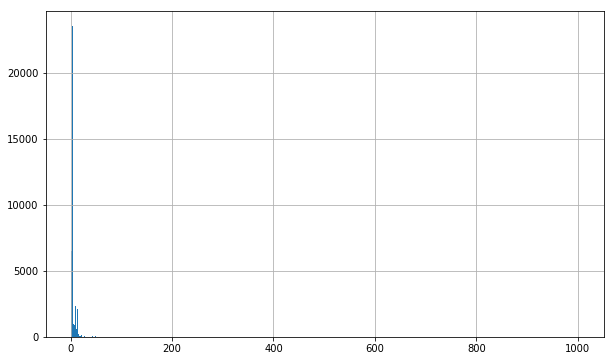

In [630]:
row_sums_df_bin.hist(bins=500)

Frequencies of SNVs observed in $x$ samples from $x= [1 \rightarrow 25] $

In [631]:
for i in range(25):
    print(f'{i+1} {(row_sums_df_bin >= i+1).sum()}')

1 37727
2 31890
3 31220
4 30499
5 7640
6 7510
7 6670
8 6269
9 5787
10 4014
11 3435
12 3342
13 2869
14 770
15 764
16 692
17 587
18 519
19 494
20 473
21 463
22 366
23 364
24 364
25 360


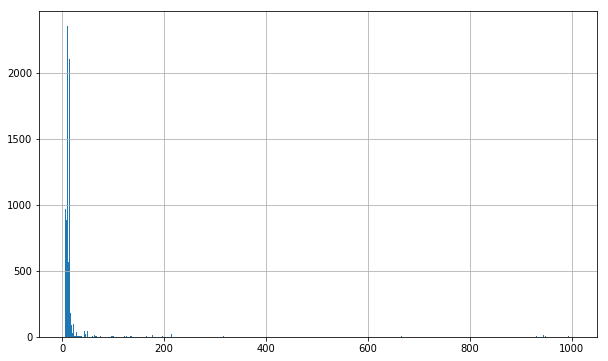

In [632]:
row_sums_df_bin[row_sums_df_bin >= 5].hist(bins=500)

Using the row counts and the minimum group size $N$, we can filter for rows that have SNVs that are present in at least $N$ samples:

In [633]:
df_bin_gte_mgs_5 = df_bin[row_sums_df_bin >= 5]

In [644]:
df_bin.shape

(37727, 1002)

In [634]:
df_bin_gte_mgs_5.shape

(7640, 1002)

Finding SNVs using the full SNV matrix takes a while. There may be ways to speed this up by limiting the amount of copying of data. 

In [644]:
df_bin.shape

(37727, 1002)

In [643]:
%timeit -n 1  snvs_for_subtype(subtype_node, df_bin)

787 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It's about 4-5X faster to find SNVs from a reduced SNV matrix.

In [645]:
df_bin_gte_mgs_5.shape

(7640, 1002)

In [642]:
%timeit -n 1  snvs_for_subtype(subtype_node, df_bin_gte_mgs_5)

165 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
